In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)

In [8]:
total_review_sroce = pd.read_excel('/Users/dhkim/Downloads/Total_review_score.xlsx')
total_review_sroce

지점명  Review_Mean  Counts     Score  Rank
0       스타벅스 강동구청DT점     0.425693     397  0.466487    31
1       스타벅스 강동암사DT점     0.150000     420  0.134676   243
2       스타벅스 강릉송정DT점     0.410256     117  0.355633    88
3     스타벅스 경기광주송정DT점     0.277311     119  0.223061   194
4     스타벅스 경기광주신현DT점     0.201735     461  0.386742    66
5     스타벅스 경기광주쌍령DT점     0.233010     103  0.175603   227
6       스타벅스 경남사천DT점     0.306977     215  0.282932   150
7       스타벅스 경산중방DT점     0.234139     662  0.462436    33
8    스타벅스 경인교대입구역DT점     0.381215     181  0.355219    89
9      스타벅스 경주보문로DT점     0.109489     548  0.185750   224
10    스타벅스 경주보문호수DT점     0.162338     770  0.297979   135
11     스타벅스 경주터미널DT점     0.309343     792  0.645970     4
12      스타벅스 계룡대로DT점     0.210708     579  0.407475    58
13        스타벅스 고양DT점     0.236967     633  0.469146    30
14        스타벅스 공릉DT점     0.194332     741  0.369774    78
15     스타벅스 공주동학사DT점     0.307692     377  0.313262   123
16        스타벅스 과천DT점     0.210638     470  0.407313    59
17      스타벅스 광명소하DT점     0.217143     525  0.422452    52
18      스타벅스 광주금호DT점     0.166297     451  0.306722   127
19      스타벅스 광주매곡DT점     0.286747     415  0.292496   138
20      스타벅스 광주방림DT점     0.180438     593  0.338281    99
21      스타벅스 광주산정DT점     0.269231     234  0.245507   180
22      스타벅스 광주상무DT점     0.319588     194  0.291286   139
23      스타벅스 광주선운DT점     0.365385      52  0.257559   174
24      스타벅스 광주수완DT점     0.155070     503  0.282043   152
25      스타벅스 광주신가DT점     0.237164     409  0.232344   186
26     스타벅스 광주신세계DT점     0.320930     215  0.298434   133
27      스타벅스 광주신안DT점     0.309942     342  0.310838   126
28      스타벅스 광주연제DT점     0.500000      30  0.324576   111
29      스타벅스 광주용두DT점     0.162393     585  0.298102   134
..               ...          ...     ...       ...   ...
222    스타벅스 천안IC DT점     0.174648     355  0.157164   231
223    스타벅스 천안두정역DT점     0.288889      90  0.220745   196
224     스타벅스 천안불당DT점     0.286145     332  0.280992   153
225   스타벅스 천안서부대로DT점     0.043478     230  0.027446   252
226     스타벅스 천안성정DT점     0.228745     494  0.449681    38
227     스타벅스 청주봉명DT점     0.226804     582  0.445107    40
228     스타벅스 청주비하DT점     0.367521     117  0.311655   124
229     스타벅스 청주사직DT점     0.245361     485  0.489158    23
230     스타벅스 청주용담DT점     0.170404     446  0.315833   119
231     스타벅스 청주용암DT점     0.208226     389  0.197102   216
232     스타벅스 청주율량DT점     0.161812     618  0.296823   137
233     스타벅스 춘천석사DT점     0.151762     738  0.274838   157
234     스타벅스 춘천후평DT점     0.179191     519  0.335476   101
235     스타벅스 충남보령DT점     0.266667     180  0.231097   187
236     스타벅스 충주시청DT점     0.167832     286  0.144338   238
237     스타벅스 충주호암DT점     0.393333     300  0.404467    62
238       스타벅스 평내DT점     0.176580     538  0.329619   105
239      스타벅스 평촌역DT점     0.392344     209  0.377811    71
240     스타벅스 평택서정DT점     0.247664     214  0.218482   198
241     스타벅스 평택안중DT점     0.347826     161  0.311101   125
242       스타벅스 포천DT점     0.281174     409  0.284999   148
243     스타벅스 포항쌍용DT점     0.244813     482  0.487849    24
244     스타벅스 포항장성DT점     0.258741     429  0.259978   170
245     스타벅스 포항죽도DT점     0.342282     149  0.300544   130
246    스타벅스 풍무사거리DT점     0.518987      79  0.433129    45
247      스타벅스 풍무역DT점     0.320225     178  0.287242   143
248     스타벅스 하남미사DT점     0.206478     247  0.180312   225
249   스타벅스 해운대달맞이DT점     0.143089     615  0.256102   175
250       스타벅스 화곡DT점     0.280282     710  0.573848     6
251     스타벅스 화성병점DT점     0.391813     171  0.363115    84

[252 rows x 5 columns]

In [9]:
traffic_info = pd.read_excel('/Users/dhkim/Downloads/Starbucks_DT_Traffics_postprocessed.xlsx')
traffic_info

지점명    STREET1 TRAFFIC1     STREET2 TRAFFIC2     STREET3  \
0       스타벅스 경주보문로DT점        보문로       서행         보문로      미확인         보문로   
1      스타벅스 해운대달맞이DT점      좌동순환로       정체        달맞이길       정체  좌동순환로468번길   
2       스타벅스 영등포신길DT점        신길로       정체      신길로33길      미확인         신길로   
3         스타벅스 역곡역DT점        경인로       정체    경인로483번길       정체         경인로   
4        스타벅스 천안성정DT점       서부2길       서행        동서대로       정체      성정공원1길   
5          스타벅스 연희DT점        연희로       정체         연희로       정체         연희로   
6       스타벅스 오산IC DT점        원동로       정체         원동로       정체         원동로   
7        스타벅스 구미시청DT점       송정대로       서행       백산로4길      미확인        송정대로   
8        스타벅스 제주중문DT점       천제연로       서행        천제연로      미확인        천제연로   
9       스타벅스 대전신탄진DT점     석봉로3번길      미확인        대덕대로       서행        덕암북로   
10     스타벅스 대구칠곡대로DT점     칠곡중앙대로       서행      칠곡중앙대로       서행      칠곡중앙대로   
11       스타벅스 용인동백DT점        어정로       정체         어정로       정체         어정로   
12       스타벅스 춘천석사DT점        후석로       정체         후석로      미확인         후석로   
13       스타벅스 대구평리DT점       서대구로       서행        서대구로       정체        서대구로   
14         스타벅스 동해DT점        중앙로      미확인         중앙로      미확인         중앙로   
15    스타벅스 대구중동네거리DT점        청수로       서행         청수로       서행         청수로   
16       스타벅스 안양호계DT점       엘에스로       정체        엘에스로       정체        엘에스로   
17       스타벅스 일산덕이DT점        탄중로       서행         탄중로       정체         탄중로   
18       스타벅스 계룡대로DT점       번영1길      미확인        번영1길      미확인        번영1길   
19       스타벅스 대구칠성DT점       중앙대로       정체        중앙대로       서행        중앙대로   
20       스타벅스 광주화정DT점       상무대로       정체    화정로179번길       서행        상무대로   
21       스타벅스 금정구청DT점       중앙대로       정체        무학송로       서행        중앙대로   
22       스타벅스 전주평화DT점        모악로       서행        평화6길       서행         모악로   
23     스타벅스 북수원IC DT점       경수대로       서행        경수대로       서행        경수대로   
24       스타벅스 용인보라DT점       용구대로       정체        용구대로       정체        용구대로   
25       스타벅스 인천강화DT점       강화대로       서행        강화대로       서행        강화대로   
26     스타벅스 부평삼거리역DT점        경인로       서행         경인로       서행         경인로   
27       스타벅스 원주명륜DT점        남원로       정체         남원로      미확인         남원로   
28       스타벅스 강동구청DT점      성내로8길      미확인       성내로8길      미확인         성내로   
29     스타벅스 경기광주송정DT점       경안천로       서행        경안천로       서행        경안천로   
..                ...        ...      ...         ...      ...         ...   
222      스타벅스 포항죽도DT점      새천년대로       서행  새천년대로460번길       서행       새천년대로   
223        스타벅스 밀양DT점       밀양대로       서행        밀양대로       서행        밀양대로   
224     스타벅스 공주동학사DT점       임금봉길       서행       동학사1로       서행        임금봉길   
225      스타벅스 당진시곡DT점        반촌로      미확인         서해로       서행         서해로   
226    스타벅스 남양산IC DT점       양산대로       원활        양산대로       서행        양산대로   
227      스타벅스 제주도남DT점        연북로       원활         연북로       서행         연북로   
228      스타벅스 경남사천DT점       사천대로       서행        사천대로       서행         옥산로   
229  스타벅스 의정부예술의전당DT점        경의로       정체         경의로       서행         경의로   
230      스타벅스 김해구산DT점       김해대로       원활        김해대로       서행        김해대로   
231        스타벅스 과천DT점        중앙로       원활         중앙로       서행         중앙로   
232      스타벅스 광주지산DT점        지산로       정체     동명로70번길      미확인         지산로   
233      스타벅스 양주송추DT점        호국로       원활         호국로       서행         호국로   
234      스타벅스 충주호암DT점       중원대로      미확인        중원대로      미확인        중원대로   
235   스타벅스 대구수성도서관DT점        화랑로       서행         화랑로       서행         화랑로   
236      스타벅스 세종다정DT점      한누리대로       서행        다정북로       정체       한누리대로   
237    스타벅스 경기광주쌍령DT점       경충대로       원활        경충대로       서행        경충대로   
238      스타벅스 마산회원DT점     회원동29길      미확인      3.15대로       원활      3.15대로   
239       스타벅스 평촌역DT점       시민대로       정체   시민대로365번길       정체    벌말로118번길   
240      스타벅스 시흥대야DT점      뱀내장터로      미확인       뱀내장터로       정체         복지로   
241    스타벅스 수원경수인계DT점  경수대로507번길      미확

In [10]:
# starbucks_feature4 = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200710_nan2mean_normalization_DTscore.xlsx')
starbucks_feature4 = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200710.xlsx')
starbucks_feature4

지점명    맥도날드 거리  관광지 리뷰수    관광지 거리  아파트 준공년월  아파트 세대수  \
0       스타벅스 강동구청DT점   1.197120     6187  0.994486    6584.0    349.0   
1       스타벅스 강동암사DT점   1.431670       12  0.357707    6461.0    490.0   
2       스타벅스 강릉송정DT점  32.575218      403  0.496815   14435.0    640.0   
3     스타벅스 경기광주송정DT점  10.539850    16907  2.511173    3692.0    344.0   
4     스타벅스 경기광주신현DT점   5.578334     2692  2.560675     740.0    480.0   
5     스타벅스 경기광주쌍령DT점  12.479779    16907  1.518413     831.0   1425.0   
6       스타벅스 경남사천DT점   0.076778     2896  0.710316       NaN      NaN   
7       스타벅스 경산중방DT점   3.097773     2975  0.759696   11393.0     59.0   
8    스타벅스 경인교대입구역DT점   1.419503    18794  0.526604   12974.0    280.0   
9      스타벅스 경주보문로DT점   1.330699    52989  0.378324       NaN      NaN   
10    스타벅스 경주보문호수DT점   0.939125     8838  0.650093       NaN      NaN   
11     스타벅스 경주터미널DT점   0.162548        0  0.326158       NaN      NaN   
12      스타벅스 계룡대로DT점   9.491635    25998  0.958507    8287.0   1850.0   
13        스타벅스 고양DT점   0.758012      119  0.672468    5883.0    958.0   
14        스타벅스 공릉DT점   2.567223        0  0.239760    7741.0    145.0   
15     스타벅스 공주동학사DT점   7.916994     1103  0.570342       NaN      NaN   
16        스타벅스 과천DT점   5.423097      294  0.364454   13493.0   1400.0   
17      스타벅스 광명소하DT점   2.100836        0  0.899461    3447.0    797.0   
18      스타벅스 광주금호DT점   1.143453    17609  0.117079    3327.0    470.0   
19      스타벅스 광주매곡DT점   0.507894        0  0.945587       NaN      NaN   
20      스타벅스 광주방림DT점   2.826769       16  0.410654    4330.0    987.0   
21      스타벅스 광주산정DT점   0.885752    16808  1.224178    6188.0   1300.0   
22      스타벅스 광주상무DT점   0.743216        0  0.451882    1652.0    536.0   
23      스타벅스 광주선운DT점   4.445994    16808  1.983040    2201.0    378.0   
24      스타벅스 광주수완DT점   4.451412    16808  1.987825    4239.0    753.0   
25      스타벅스 광주신가DT점   3.009463    16808  0.755720    3478.0    545.0   
26     스타벅스 광주신세계DT점   1.312255     1718  0.493305   14985.0    276.0   
27      스타벅스 광주신안DT점   1.563804        0  1.315755       NaN      NaN   
28      스타벅스 광주연제DT점   1.346113    26187  1.904331    4727.0    353.0   
29      스타벅스 광주용두DT점   0.326087    17256  2.359984    2262.0    613.0   
..               ...        ...      ...       ...       ...      ...   
222    스타벅스 천안IC DT점   1.093438      356  1.047218     801.0   2144.0   
223    스타벅스 천안두정역DT점   1.754823      356  1.842047    8622.0   1038.0   
224     스타벅스 천안불당DT점   2.187814        0  0.578645    1652.0   1096.0   
225   스타벅스 천안서부대로DT점   1.112797        0  1.886180    9748.0    990.0   
226     스타벅스 천안성정DT점   1.029443      356  1.333219    1408.0    190.0   
227     스타벅스 청주봉명DT점   3.366536    28189  1.235513   10083.0    232.0   
228     스타벅스 청주비하DT점   0.027476     3092  0.995459    6400.0    952.0   
229     스타벅스 청주사직DT점   2.396101    28189  0.644856    4027.0    576.0   
230     스타벅스 청주용담DT점   0.764938     2066  0.240597     890.0    901.0   
231     스타벅스 청주용암DT점   1.917710     1214  0.258210    9322.0    476.0   
232     스타벅스 청주율량DT점   0.942374     9532  1.226429    1500.0    508.0   
233     스타벅스 춘천석사DT점   0.774754      439  1.404319    6645.0   1110.0   
234     스타벅스 춘천후평DT점   0.209873      518  1.277632    4422.0   1792.0   
235     스타벅스 충남보령DT점   0.835998     7247  2.284624     252.0    517.0   
236     스타벅스 충주시청DT점   1.199674     3138  2.010205     921.0    608.0   
237     스타벅스 충주호암DT점   2.296501        0  0.830157     344.0    892.0   
238       스타벅스 평내DT점   0.042461        0  0.591346    5610.0    595.0   
239      스타벅스 평촌역DT점   2.685946        0  1.172325     252.0   1774.0   
240     스타벅스 평택서정DT점   0.411734    18767  1.751853   11513.0    520.0   
241     스타벅스 평택안중DT점  14.825793        0  2.657162    5579.0    744.0   
242       스타벅스 포천DT점   0.315684     7652  2.872044    7010.0    398.0   
243     스타벅스 포항쌍용DT점   0.553478        0  0.952911       NaN      NaN   
244     스타벅스 포항장성DT점   0.067776        0  1.062513    3509.0   1713.0   
24

In [22]:
traffic_info = traffic_info.sort_values('지점명')

In [23]:
traffic_info['average_score']

28     0.833333
203    2.333333
89     1.333333
29     1.833333
97     1.833333
         ...   
106    1.166667
100    2.833333
1      2.333333
160    2.333333
251    3.833333
Name: average_score, Length: 252, dtype: float64

In [24]:
starbucks_feature4['교통량 점수'] = traffic_info['average_score']

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
temp_df = starbucks_feature4.drop('지점명', axis=1)
fitted = min_max_scaler.fit(temp_df)
print(fitted.data_max_)
## 출력 결과
## [891.       1.       3.      80.       8.       6.     512.3292]
starbucks_feature3_ = min_max_scaler.transform(temp_df)
starbucks_feature5 = pd.DataFrame(starbucks_feature3_, columns=temp_df.columns, index=list(temp_df.index.values))
# starbucks_feature3['지점명'] = ''
starbucks_feature5['지점명'] = starbucks_feature4['지점명']
starbucks_feature4 = starbucks_feature5[starbucks_feature4.columns]
starbucks_feature4

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


지점명   맥도날드 거리   관광지 리뷰수    관광지 거리  아파트 준공년월   아파트 세대수  \
0      스타벅스 강동구청DT점  0.034712  0.109839  0.194783  0.394738  0.094855   
1      스타벅스 강동암사DT점  0.041514  0.000213  0.070061  0.387071  0.135384   
2      스타벅스 강릉송정DT점  0.944571  0.007155  0.097307  0.884172  0.178500   
3    스타벅스 경기광주송정DT점  0.305620  0.300153  0.491845  0.214450  0.093418   
4    스타벅스 경기광주신현DT점  0.161753  0.047792  0.501540  0.030422  0.132509   
..              ...       ...       ...       ...       ...       ...   
247     스타벅스 풍무역DT점  0.091045  0.332339  0.429653  0.125304  0.271917   
248    스타벅스 하남미사DT점  0.108024  0.085215  0.104341  0.062527  0.345789   
249  스타벅스 해운대달맞이DT점  0.033188  0.757279  0.069033  0.000000  0.248060   
250      스타벅스 화곡DT점  0.060234  0.000000  0.112099  0.413628  0.019546   
251    스타벅스 화성병점DT점  0.022566  0.438166  0.534825  0.318746  0.025870   

       아파트 거리  아파트 매매가 상한    주유소 거리  인근 스타벅스 거리    교통량 점수    최근접 대기업 거리  \
0    0.000015    0.025460  0.039968    0.042376  0.166667  4.475242e-03   
1    0.000014    0.031551  0.069969    0.049049  0.583333  4.115581e-02   
2    0.000072    0.000000  0.001667    1.000000  0.250000  7.671276e-02   
3    0.000087    0.009014  0.004900    0.052386  0.708333  4.989616e-02   
4    0.000018    0.016628  0.046635    1.000000  0.666667  2.709925e-02   
..        ...         ...       ...         ...       ...           ...   
247  0.000097    0.012212  0.059969    0.109109  0.291667  4.395568e-02   
248  0.000080    0.036119  1.000000    0.045712  0.541667  2.260156e-14   
249  0.000010    1.000000  0.016934    0.023524  0.708333  3.712441e-02   
250  0.000020    0.015562  0.046635    0.035702  1.000000  2.815083e-02   
251  0.000016    0.005665  0.029868    0.055722  0.958333  3.464562e-03   

     최근접 대기업 자본금  5km내 대기업 개수  3개월 영수증 개수    3개월 점수     DT 지수  
0       0.010739     0.227979    0.701863  0.421851  0.257667  
1       0.020345     0.150259    0.658385  0.320840  0.144355  
2       0.036629     0.010363    0.347826  0.480306  0.235143  
3       0.515754     0.015544    0.298137  0.427529  0.172486  
4       0.004265     0.072539    0.403727  0.241895  0.064256  
..           ...          ...         ...       ...       ...  
247     0.041094     0.025907    0.453416  0.278297  0.090132  
248     0.004397     0.031088    0.509317  0.152072  0.028524  
249     0.037564     0.010363    0.322981  0.744576  0.544531  
250     0.006972     0.310881    0.695652  0.676013  0.658751  
251     0.003960     0.067358    0.416149  0.406656  0.184372  

[252 rows x 17 columns]

In [22]:
starbucks_feature4.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200710_nan2mean_normalization_DTscore.xlsx', index=False)

In [19]:
starbucks_feature4 = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200710_nan2mean_normalization_DTscore.xlsx')

In [28]:
# total_review_sroce['지점명'] = total_review_sroce['StarbucksDT'].map(lambda x:x+'점')

In [25]:
total_review_sroce = total_review_sroce.sort_values('지점명')

In [31]:
# total_review_sroce = total_review_sroce[[total_review_sroce.columns[0]] + list(total_review_sroce.columns[2:])]

In [26]:
total_review_sroce = total_review_sroce.reset_index(drop=True)

In [33]:
# total_review_sroce.to_excel('/Users/dhkim/Downloads/Total_review_score.xlsx', index=False)

In [23]:
total_review_sroce = pd.read_excel('/Users/dhkim/Downloads/Total_review_score.xlsx')

In [27]:
total_review_sroce

지점명  Review_Mean  Counts     Score  Rank
0       스타벅스 강동구청DT점     0.425693     397  0.466487    31
1       스타벅스 강동암사DT점     0.150000     420  0.134676   243
2       스타벅스 강릉송정DT점     0.410256     117  0.355633    88
3     스타벅스 경기광주송정DT점     0.277311     119  0.223061   194
4     스타벅스 경기광주신현DT점     0.201735     461  0.386742    66
5     스타벅스 경기광주쌍령DT점     0.233010     103  0.175603   227
6       스타벅스 경남사천DT점     0.306977     215  0.282932   150
7       스타벅스 경산중방DT점     0.234139     662  0.462436    33
8    스타벅스 경인교대입구역DT점     0.381215     181  0.355219    89
9      스타벅스 경주보문로DT점     0.109489     548  0.185750   224
10    스타벅스 경주보문호수DT점     0.162338     770  0.297979   135
11     스타벅스 경주터미널DT점     0.309343     792  0.645970     4
12      스타벅스 계룡대로DT점     0.210708     579  0.407475    58
13        스타벅스 고양DT점     0.236967     633  0.469146    30
14        스타벅스 공릉DT점     0.194332     741  0.369774    78
15     스타벅스 공주동학사DT점     0.307692     377  0.313262   123
16        스타벅스 과천DT점     0.210638     470  0.407313    59
17      스타벅스 광명소하DT점     0.217143     525  0.422452    52
18      스타벅스 광주금호DT점     0.166297     451  0.306722   127
19      스타벅스 광주매곡DT점     0.286747     415  0.292496   138
20      스타벅스 광주방림DT점     0.180438     593  0.338281    99
21      스타벅스 광주산정DT점     0.269231     234  0.245507   180
22      스타벅스 광주상무DT점     0.319588     194  0.291286   139
23      스타벅스 광주선운DT점     0.365385      52  0.257559   174
24      스타벅스 광주수완DT점     0.155070     503  0.282043   152
25      스타벅스 광주신가DT점     0.237164     409  0.232344   186
26     스타벅스 광주신세계DT점     0.320930     215  0.298434   133
27      스타벅스 광주신안DT점     0.309942     342  0.310838   126
28      스타벅스 광주연제DT점     0.500000      30  0.324576   111
29      스타벅스 광주용두DT점     0.162393     585  0.298102   134
..               ...          ...     ...       ...   ...
222    스타벅스 천안IC DT점     0.174648     355  0.157164   231
223    스타벅스 천안두정역DT점     0.288889      90  0.220745   196
224     스타벅스 천안불당DT점     0.286145     332  0.280992   153
225   스타벅스 천안서부대로DT점     0.043478     230  0.027446   252
226     스타벅스 천안성정DT점     0.228745     494  0.449681    38
227     스타벅스 청주봉명DT점     0.226804     582  0.445107    40
228     스타벅스 청주비하DT점     0.367521     117  0.311655   124
229     스타벅스 청주사직DT점     0.245361     485  0.489158    23
230     스타벅스 청주용담DT점     0.170404     446  0.315833   119
231     스타벅스 청주용암DT점     0.208226     389  0.197102   216
232     스타벅스 청주율량DT점     0.161812     618  0.296823   137
233     스타벅스 춘천석사DT점     0.151762     738  0.274838   157
234     스타벅스 춘천후평DT점     0.179191     519  0.335476   101
235     스타벅스 충남보령DT점     0.266667     180  0.231097   187
236     스타벅스 충주시청DT점     0.167832     286  0.144338   238
237     스타벅스 충주호암DT점     0.393333     300  0.404467    62
238       스타벅스 평내DT점     0.176580     538  0.329619   105
239      스타벅스 평촌역DT점     0.392344     209  0.377811    71
240     스타벅스 평택서정DT점     0.247664     214  0.218482   198
241     스타벅스 평택안중DT점     0.347826     161  0.311101   125
242       스타벅스 포천DT점     0.281174     409  0.284999   148
243     스타벅스 포항쌍용DT점     0.244813     482  0.487849    24
244     스타벅스 포항장성DT점     0.258741     429  0.259978   170
245     스타벅스 포항죽도DT점     0.342282     149  0.300544   130
246    스타벅스 풍무사거리DT점     0.518987      79  0.433129    45
247      스타벅스 풍무역DT점     0.320225     178  0.287242   143
248     스타벅스 하남미사DT점     0.206478     247  0.180312   225
249   스타벅스 해운대달맞이DT점     0.143089     615  0.256102   175
250       스타벅스 화곡DT점     0.280282     710  0.573848     6
251     스타벅스 화성병점DT점     0.391813     171  0.363115    84

[252 rows x 5 columns]

In [36]:
count_value_39th = total_review_sroce.sort_values('Counts')['Counts'].values[39]

In [37]:
except_store = total_review_sroce[total_review_sroce.Counts.map(lambda x:x<count_value_39th)]
contain_store = total_review_sroce[total_review_sroce.Counts.map(lambda x:x>=count_value_39th)]

In [38]:
except_store.index

Int64Index([  2,   3,   5,  23,  28,  33,  34,  35,  37,  44,  45,  47,  48,
             55,  58,  72,  73,  89, 107, 108, 111, 130, 133, 137, 142, 152,
            154, 175, 180, 186, 191, 202, 210, 213, 223, 228, 241, 245, 246],
           dtype='int64')

In [39]:
contain_store.head()

지점명  Review_Mean  Counts     Score  Rank
0    스타벅스 강동구청DT점     0.425693     397  0.466487    31
1    스타벅스 강동암사DT점     0.150000     420  0.134676   243
4  스타벅스 경기광주신현DT점     0.201735     461  0.386742    66
6    스타벅스 경남사천DT점     0.306977     215  0.282932   150
7    스타벅스 경산중방DT점     0.234139     662  0.462436    33

In [28]:
starbucks_feature4 =  starbucks_feature4.sort_values('지점명')
starbucks_feature4['리뷰 점수'] = total_review_sroce['Score']

In [42]:
starbucks_feature_drop_smallreview = starbucks_feature4.drop(except_store.index)

In [43]:
starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.reset_index(drop=True)
starbucks_feature_drop_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점제외_before_norm.xlsx', index=False)

In [11]:
starbucks_feature_drop_smallreview = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점제외_before_norm.xlsx')

In [13]:
# starbucks_feature_smallreview = starbucks_feature4.drop(contain_store.index)

In [46]:
starbucks_feature_smallreview = starbucks_feature_smallreview.reset_index(drop=True)
starbucks_feature_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만_before_norm.xlsx', index=False)

In [14]:
starbucks_feature_smallreview = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만.xlsx')

## 최근 지점 상관없이 모든 스타벅스 DT 지점 포함한 상관계수

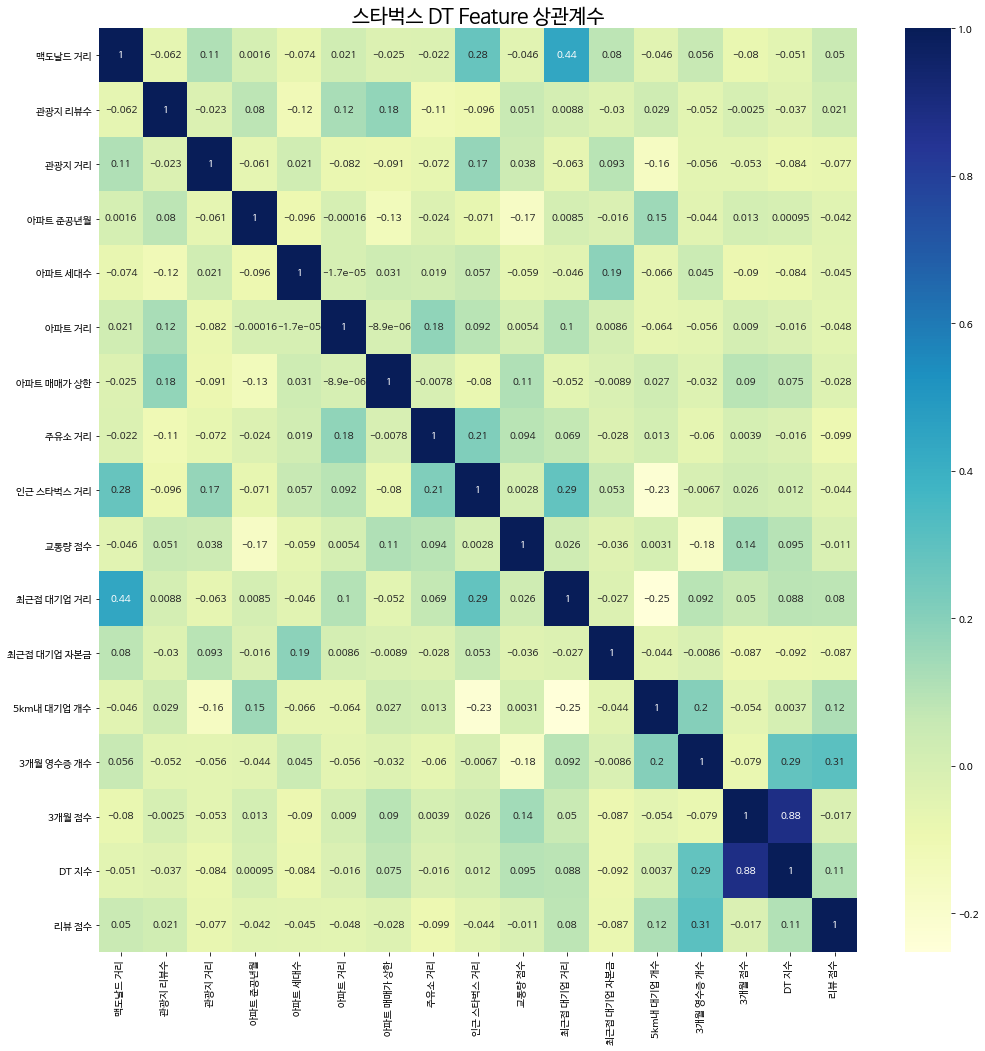

In [151]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(starbucks_feature4.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
save_plot.savefig("스타벅스 DT Feature 상관계수.png")

# 최근지점 제외하지 않고 모두 합했을 때 아래 계산 결과가 나옴

## 1안, 3개월 영수증 개수 + 리뷰 점수 섞기

In [30]:
recipt_num = starbucks_feature4['3개월 영수증 개수']
recipt_score = starbucks_feature4['3개월 점수']
DT_score = starbucks_feature4['DT 지수']
RV_score = starbucks_feature4['리뷰 점수']

In [60]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
target_data = starbucks_feature4[['3개월 영수증 개수', '리뷰 점수']]
scaled_data = minmax_scaler.fit_transform(target_data)
starbucks_feature4['영수증 개수 norm'] = scaled_data[:,0]
starbucks_feature4['리뷰 점수 norm'] = scaled_data[:,1]

In [74]:
def mmscale2(df, row_val, col):
    up = (row_val - df[col].min())
    down = (df[col].max() - df[col].min()+1e-7)
    return up/down

In [90]:
def mmscale(df, row, col):
    up = (row[col] - df[col].min())
    down = (df[col].max() - df[col].min()+1e-7)
    return up/down

In [82]:
starbucks_feature4['test']= starbucks_feature4['3개월 영수증 개수'].map(lambda row:mmscale2(starbucks_feature4, row, '3개월 영수증 개수'))

In [91]:
starbucks_feature5 = starbucks_feature4.copy()

In [92]:
starbucks_feature5['score A2'] = starbucks_feature4.apply(
    lambda row:(mmscale(starbucks_feature4, row, '3개월 영수증 개수')*2 + mmscale(starbucks_feature4, row, '리뷰 점수'))/3, axis=1)

In [93]:
starbucks_feature5

지점명   맥도날드 거리   관광지 리뷰수    관광지 거리  아파트 준공년월   아파트 세대수  \
0       스타벅스 강동구청DT점  0.034712  0.109839  0.194783  0.394738  0.094855   
1       스타벅스 강동암사DT점  0.041514  0.000213  0.070061  0.387071  0.135384   
2       스타벅스 강릉송정DT점  0.944571  0.007155  0.097307  0.884172  0.178500   
3     스타벅스 경기광주송정DT점  0.305620  0.300153  0.491845  0.214450  0.093418   
4     스타벅스 경기광주신현DT점  0.161753  0.047792  0.501540  0.030422  0.132509   
5     스타벅스 경기광주쌍령DT점  0.361871  0.300153  0.297400  0.036095  0.404139   
6       스타벅스 경남사천DT점  0.002226  0.051413  0.139124  0.324838  0.234719   
7       스타벅스 경산중방DT점  0.089825  0.052816  0.148796  0.694533  0.011498   
8    스타벅스 경인교대입구역DT점  0.041161  0.333653  0.103142  0.793093  0.075022   
9      스타벅스 경주보문로DT점  0.038586  0.940722  0.074100  0.324838  0.234719   
10    스타벅스 경주보문호수DT점  0.027231  0.156902  0.127329  0.324838  0.234719   
11     스타벅스 경주터미널DT점  0.004713  0.000000  0.063882  0.324838  0.234719   
12      스타벅스 계룡대로DT점  0.275225  0.461547  0.187736  0.500904  0.526301   
13        스타벅스 고양DT점  0.021980  0.002113  0.131711  0.351038  0.269905   
14        스타벅스 공릉DT점  0.074441  0.000000  0.046960  0.466866  0.036217   
15     스타벅스 공주동학사DT점  0.229566  0.019582  0.111708  0.324838  0.234719   
16        스타벅스 과천DT점  0.157251  0.005219  0.071383  0.825447  0.396953   
17      스타벅스 광명소하DT점  0.060917  0.000000  0.176171  0.199177  0.223627   
18      스타벅스 광주금호DT점  0.033156  0.312615  0.022931  0.191696  0.129635   
19      스타벅스 광주매곡DT점  0.014727  0.000000  0.185205  0.324838  0.234719   
20      스타벅스 광주방림DT점  0.081967  0.000284  0.080432  0.254224  0.278241   
21      스타벅스 광주산정DT점  0.025684  0.298395  0.239770  0.370052  0.368209   
22      스타벅스 광주상무DT점  0.021551  0.000000  0.088507  0.087276  0.148606   
23      스타벅스 광주선운DT점  0.128919  0.298395  0.388403  0.121501  0.103191   
24      스타벅스 광주수완DT점  0.129076  0.298395  0.389340  0.248551  0.210980   
25      스타벅스 광주신가DT점  0.087264  0.298395  0.148017  0.201110  0.151193   
26     스타벅스 광주신세계DT점  0.038051  0.030500  0.096620  0.918459  0.073872   
27      스타벅스 광주신안DT점  0.045345  0.000000  0.257707  0.324838  0.234719   
28      스타벅스 광주연제DT점  0.039033  0.464902  0.372987  0.278973  0.096005   
29      스타벅스 광주용두DT점  0.009455  0.306349  0.462232  0.125304  0.170739   
..               ...       ...       ...       ...       ...       ...   
222    스타벅스 천안IC DT점  0.031706  0.006320  0.205111  0.034225  0.610808   
223    스타벅스 천안두정역DT점  0.050884  0.006320  0.360788  0.521788  0.292900   
224     스타벅스 천안불당DT점  0.063439  0.000000  0.113335  0.087276  0.309572   
225   스타벅스 천안서부대로DT점  0.032267  0.000000  0.369432  0.591983  0.279103   
226     스타벅스 천안성정DT점  0.029850  0.006320  0.261128  0.072065  0.049152   
227     스타벅스 청주봉명DT점  0.097618  0.500444  0.241991  0.612867  0.061224   
228     스타벅스 청주비하DT점  0.000797  0.054893  0.194973  0.383268  0.268181   
229     스타벅스 청주사직DT점  0.069479  0.500444  0.126303  0.235334  0.160103   
230     스타벅스 청주용담DT점  0.022181  0.036678  0.047124  0.039773  0.253521   
231     스타벅스 청주용암DT점  0.055607  0.021552  0.050574  0.565426  0.131360   
232     스타벅스 청주율량DT점  0.027326  0.169223  0.240211  0.077801  0.140558   
233     스타벅스 춘천석사DT점  0.022465  0.007794  0.275053  0.398541  0.313596   
234     스타벅스 춘천후평DT점  0.006086  0.009196  0.250240  0.259959  0.509629   
235     스타벅스 충남보령DT점  0.024241  0.128657  0.447472  0.000000  0.143145   
236     스타벅스 충주시청DT점  0.034786  0.055709  0.393724  0.041706  0.169302   
237     스타벅스 충주호암DT점  0.066591  0.000000  0.162597  0.005735  0.250934   
238       스타벅스 평내DT점  0.001231  0.000000  0.115822  0.334019  0.165565   
239      스타벅스 평촌역DT점  0.077883  0.000000  0.229614  0.000000  0.504455   
240     스타벅스 평택서정DT점  0.011939  0.333174  0.343122  0.702014  0.144007   
241     스타벅스 평택안중DT점  0.429898  0.000000  0.520438  0.332087  0.208393   
242       스타벅스 포천DT점  0.009154  0.135847  0.562526  0.421295  0.108939   
243     스타벅스 포항쌍용DT점  0.016049  0.000000  0.186639  0.324838  0.234719   
244     스타벅스 포항장성DT점 

In [52]:
# starbucks_feature5 = starbucks_feature4.drop(['3개월 영수증 개수', '3개월 점수', '리뷰 점수', 'DT 지수'], axis=1)
starbucks_feature5 = starbucks_feature4.drop(['3개월 영수증 개수', '3개월 점수', '영수증 개수 norm', '리뷰 점수', '리뷰 점수 norm'], axis=1)

### 1.가중치를 둔 뒤 합산하는 방식

In [98]:
df = starbucks_feature4.copy()

In [99]:
starbucks_feature5['score A1'] = starbucks_feature4.apply(lambda row:(mmscale(df, row, '3개월 영수증 개수') + mmscale(df, row ,'리뷰 점수'))/2, axis=1)
starbucks_feature5['score A2'] = starbucks_feature4.apply(lambda row:(mmscale(df, row, '3개월 영수증 개수')*2 + mmscale(df, row, '리뷰 점수'))/3, axis=1)
starbucks_feature5['score A3'] = starbucks_feature4.apply(lambda row:(mmscale(df, row, '3개월 영수증 개수')*3 + mmscale(df, row, '리뷰 점수'))/4, axis=1)

### 2. 곱하는 방식

In [100]:
starbucks_feature5['score B1'] = starbucks_feature4.apply(lambda row:mmscale(df, row, '3개월 영수증 개수')
                                                          * mmscale(df, row, '리뷰 점수'), axis=1)
starbucks_feature5['score B2'] = starbucks_feature4.apply(lambda row:pow(mmscale(df, row, '3개월 영수증 개수'), 2)
                                                          * np.sqrt(mmscale(df, row, '리뷰 점수')), axis=1)
starbucks_feature5['score B3'] = starbucks_feature4.apply(lambda row:(np.exp(mmscale(df, row, '3개월 영수증 개수'))-1)
                                                                      * np.log(mmscale(df, row, '리뷰 점수')+1), axis=1)

In [101]:
df5 = starbucks_feature5.copy()
df5

지점명   맥도날드 거리   관광지 리뷰수    관광지 거리  아파트 준공년월   아파트 세대수  \
0       스타벅스 강동구청DT점  0.034712  0.109839  0.194783  0.394738  0.094855   
1       스타벅스 강동암사DT점  0.041514  0.000213  0.070061  0.387071  0.135384   
2       스타벅스 강릉송정DT점  0.944571  0.007155  0.097307  0.884172  0.178500   
3     스타벅스 경기광주송정DT점  0.305620  0.300153  0.491845  0.214450  0.093418   
4     스타벅스 경기광주신현DT점  0.161753  0.047792  0.501540  0.030422  0.132509   
5     스타벅스 경기광주쌍령DT점  0.361871  0.300153  0.297400  0.036095  0.404139   
6       스타벅스 경남사천DT점  0.002226  0.051413  0.139124  0.324838  0.234719   
7       스타벅스 경산중방DT점  0.089825  0.052816  0.148796  0.694533  0.011498   
8    스타벅스 경인교대입구역DT점  0.041161  0.333653  0.103142  0.793093  0.075022   
9      스타벅스 경주보문로DT점  0.038586  0.940722  0.074100  0.324838  0.234719   
10    스타벅스 경주보문호수DT점  0.027231  0.156902  0.127329  0.324838  0.234719   
11     스타벅스 경주터미널DT점  0.004713  0.000000  0.063882  0.324838  0.234719   
12      스타벅스 계룡대로DT점  0.275225  0.461547  0.187736  0.500904  0.526301   
13        스타벅스 고양DT점  0.021980  0.002113  0.131711  0.351038  0.269905   
14        스타벅스 공릉DT점  0.074441  0.000000  0.046960  0.466866  0.036217   
15     스타벅스 공주동학사DT점  0.229566  0.019582  0.111708  0.324838  0.234719   
16        스타벅스 과천DT점  0.157251  0.005219  0.071383  0.825447  0.396953   
17      스타벅스 광명소하DT점  0.060917  0.000000  0.176171  0.199177  0.223627   
18      스타벅스 광주금호DT점  0.033156  0.312615  0.022931  0.191696  0.129635   
19      스타벅스 광주매곡DT점  0.014727  0.000000  0.185205  0.324838  0.234719   
20      스타벅스 광주방림DT점  0.081967  0.000284  0.080432  0.254224  0.278241   
21      스타벅스 광주산정DT점  0.025684  0.298395  0.239770  0.370052  0.368209   
22      스타벅스 광주상무DT점  0.021551  0.000000  0.088507  0.087276  0.148606   
23      스타벅스 광주선운DT점  0.128919  0.298395  0.388403  0.121501  0.103191   
24      스타벅스 광주수완DT점  0.129076  0.298395  0.389340  0.248551  0.210980   
25      스타벅스 광주신가DT점  0.087264  0.298395  0.148017  0.201110  0.151193   
26     스타벅스 광주신세계DT점  0.038051  0.030500  0.096620  0.918459  0.073872   
27      스타벅스 광주신안DT점  0.045345  0.000000  0.257707  0.324838  0.234719   
28      스타벅스 광주연제DT점  0.039033  0.464902  0.372987  0.278973  0.096005   
29      스타벅스 광주용두DT점  0.009455  0.306349  0.462232  0.125304  0.170739   
..               ...       ...       ...       ...       ...       ...   
222    스타벅스 천안IC DT점  0.031706  0.006320  0.205111  0.034225  0.610808   
223    스타벅스 천안두정역DT점  0.050884  0.006320  0.360788  0.521788  0.292900   
224     스타벅스 천안불당DT점  0.063439  0.000000  0.113335  0.087276  0.309572   
225   스타벅스 천안서부대로DT점  0.032267  0.000000  0.369432  0.591983  0.279103   
226     스타벅스 천안성정DT점  0.029850  0.006320  0.261128  0.072065  0.049152   
227     스타벅스 청주봉명DT점  0.097618  0.500444  0.241991  0.612867  0.061224   
228     스타벅스 청주비하DT점  0.000797  0.054893  0.194973  0.383268  0.268181   
229     스타벅스 청주사직DT점  0.069479  0.500444  0.126303  0.235334  0.160103   
230     스타벅스 청주용담DT점  0.022181  0.036678  0.047124  0.039773  0.253521   
231     스타벅스 청주용암DT점  0.055607  0.021552  0.050574  0.565426  0.131360   
232     스타벅스 청주율량DT점  0.027326  0.169223  0.240211  0.077801  0.140558   
233     스타벅스 춘천석사DT점  0.022465  0.007794  0.275053  0.398541  0.313596   
234     스타벅스 춘천후평DT점  0.006086  0.009196  0.250240  0.259959  0.509629   
235     스타벅스 충남보령DT점  0.024241  0.128657  0.447472  0.000000  0.143145   
236     스타벅스 충주시청DT점  0.034786  0.055709  0.393724  0.041706  0.169302   
237     스타벅스 충주호암DT점  0.066591  0.000000  0.162597  0.005735  0.250934   
238       스타벅스 평내DT점  0.001231  0.000000  0.115822  0.334019  0.165565   
239      스타벅스 평촌역DT점  0.077883  0.000000  0.229614  0.000000  0.504455   
240     스타벅스 평택서정DT점  0.011939  0.333174  0.343122  0.702014  0.144007   
241     스타벅스 평택안중DT점  0.429898  0.000000  0.520438  0.332087  0.208393   
242       스타벅스 포천DT점  0.009154  0.135847  0.562526  0.421295  0.108939   
243     스타벅스 포항쌍용DT점  0.016049  0.000000  0.186639  0.324838  0.234719   
244     스타벅스 포항장성DT점 

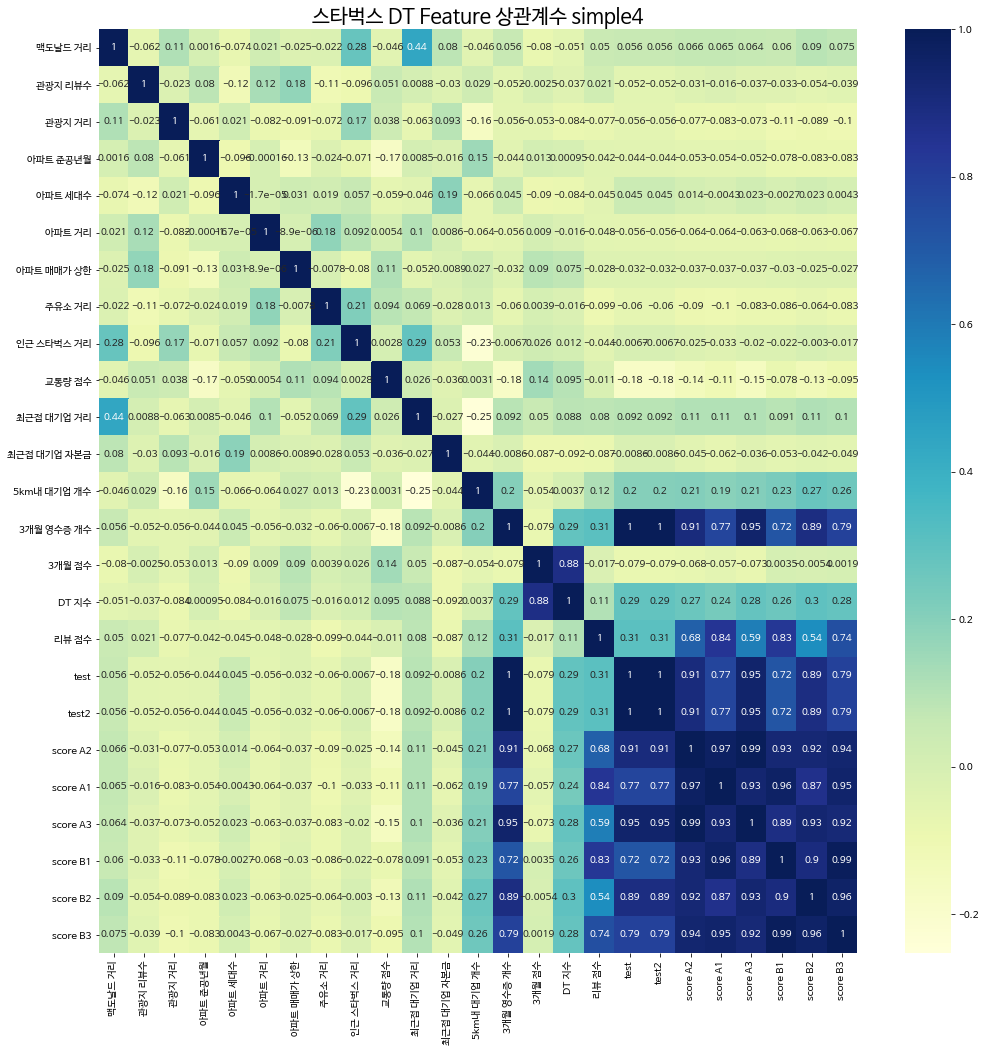

In [102]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(starbucks_feature5.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수 simple4', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
# save_plot.savefig("스타벅스 DT Feature 상관계수_simplified4.png")

#### score 방식에따라 그래프를 그려주는 함수

In [71]:
def draw_score_sorting_graph(df, cols):
    for col in cols:
        plt.figure(figsize=(10,60))
        plt.title(f'스타벅스 DT {col} sorting', fontsize=20)
        save_plot = sns.barplot(f'{col}','지점명', data= df.sort_values(col, ascending=False))
        save_plot = sns_plot.get_figure()
        save_plot.savefig(f"스타벅스 DT {col} sorting.png")

#### a) score A1, A2, A3

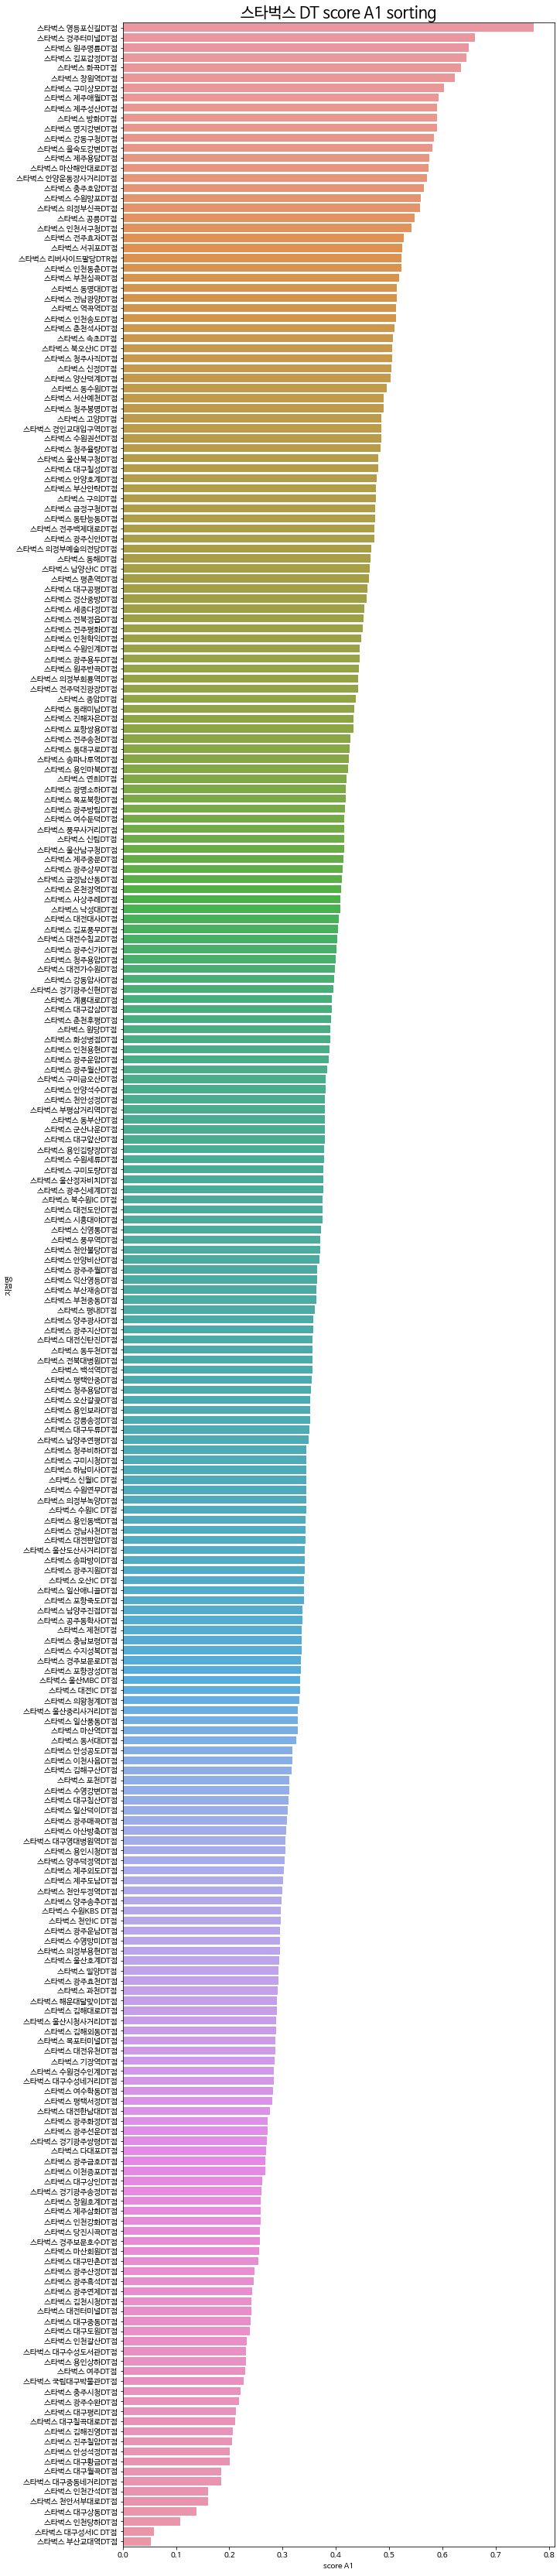

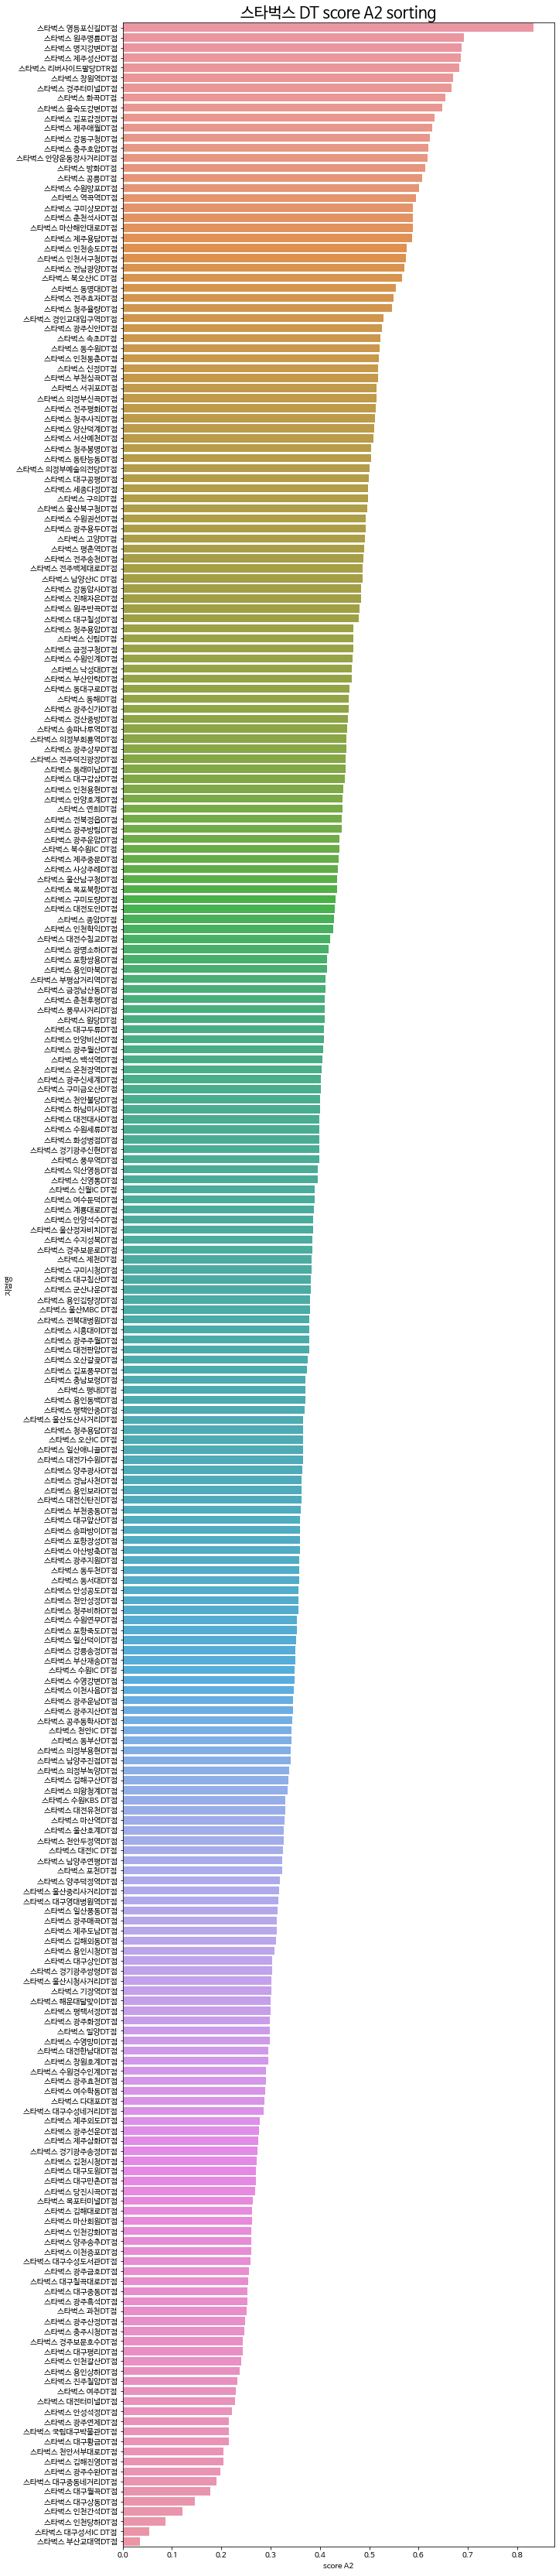

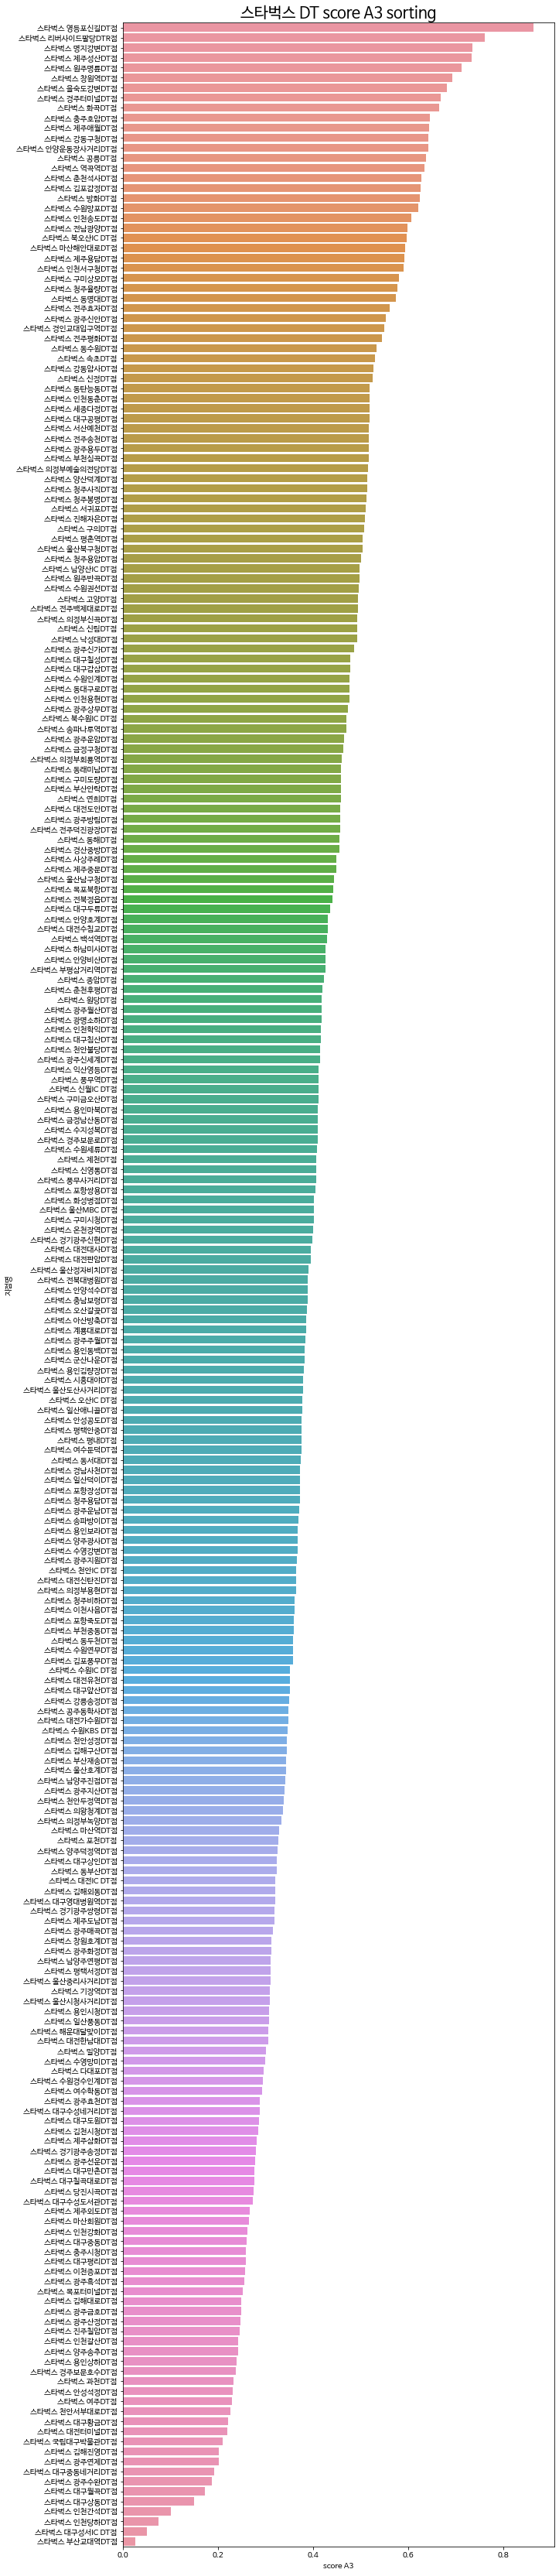

In [72]:
draw_score_sorting_graph(starbucks_feature5, ['score A1', 'score A2','score A3'])

#### a) score B1, B2, B3

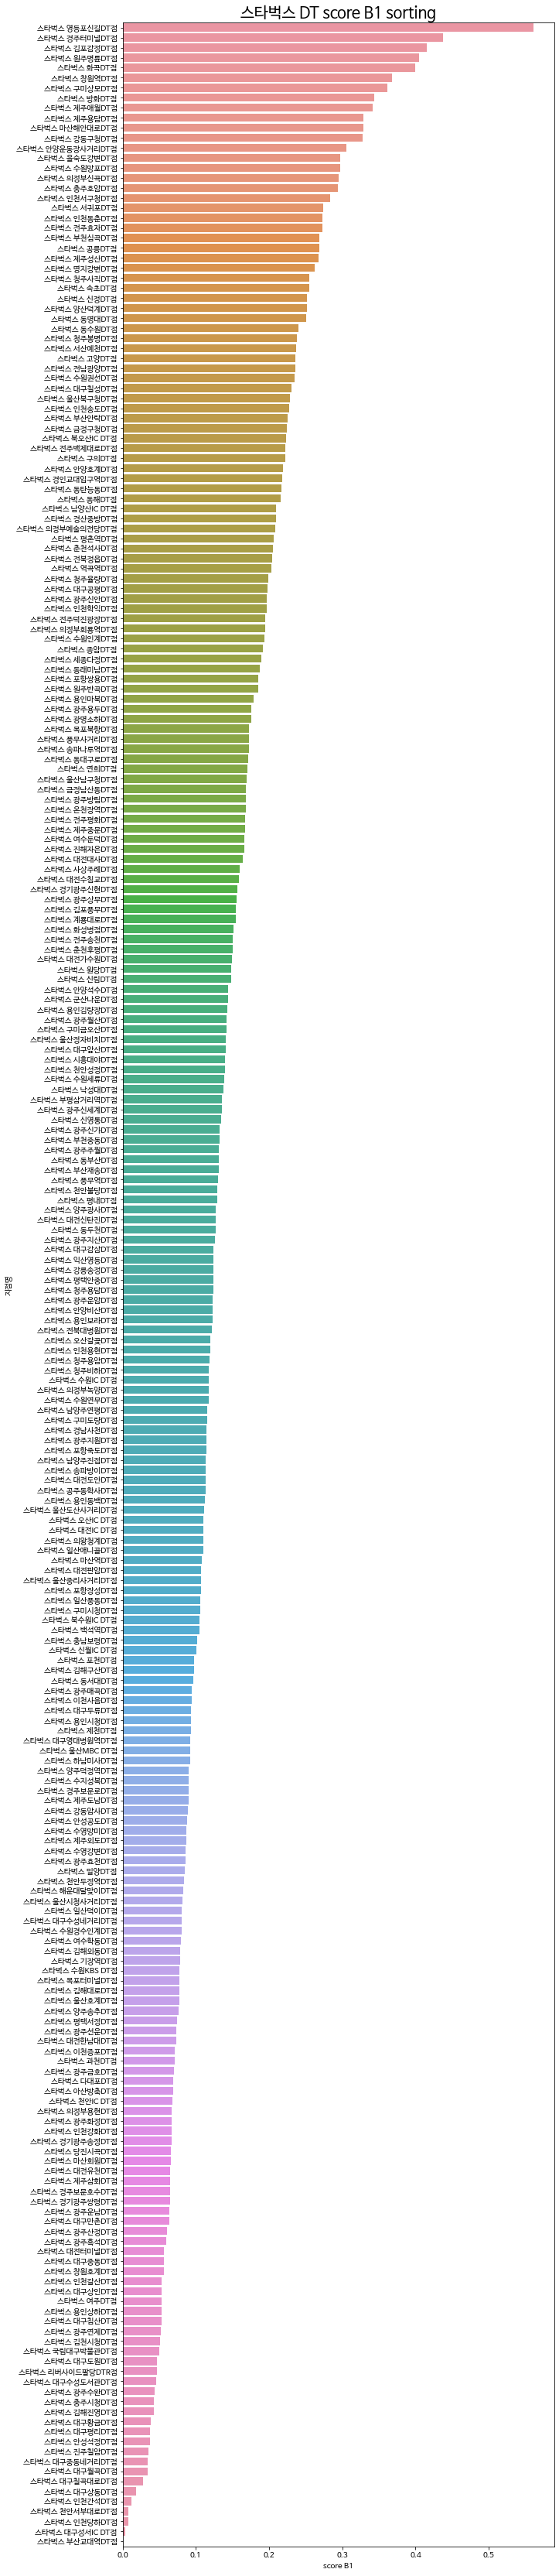

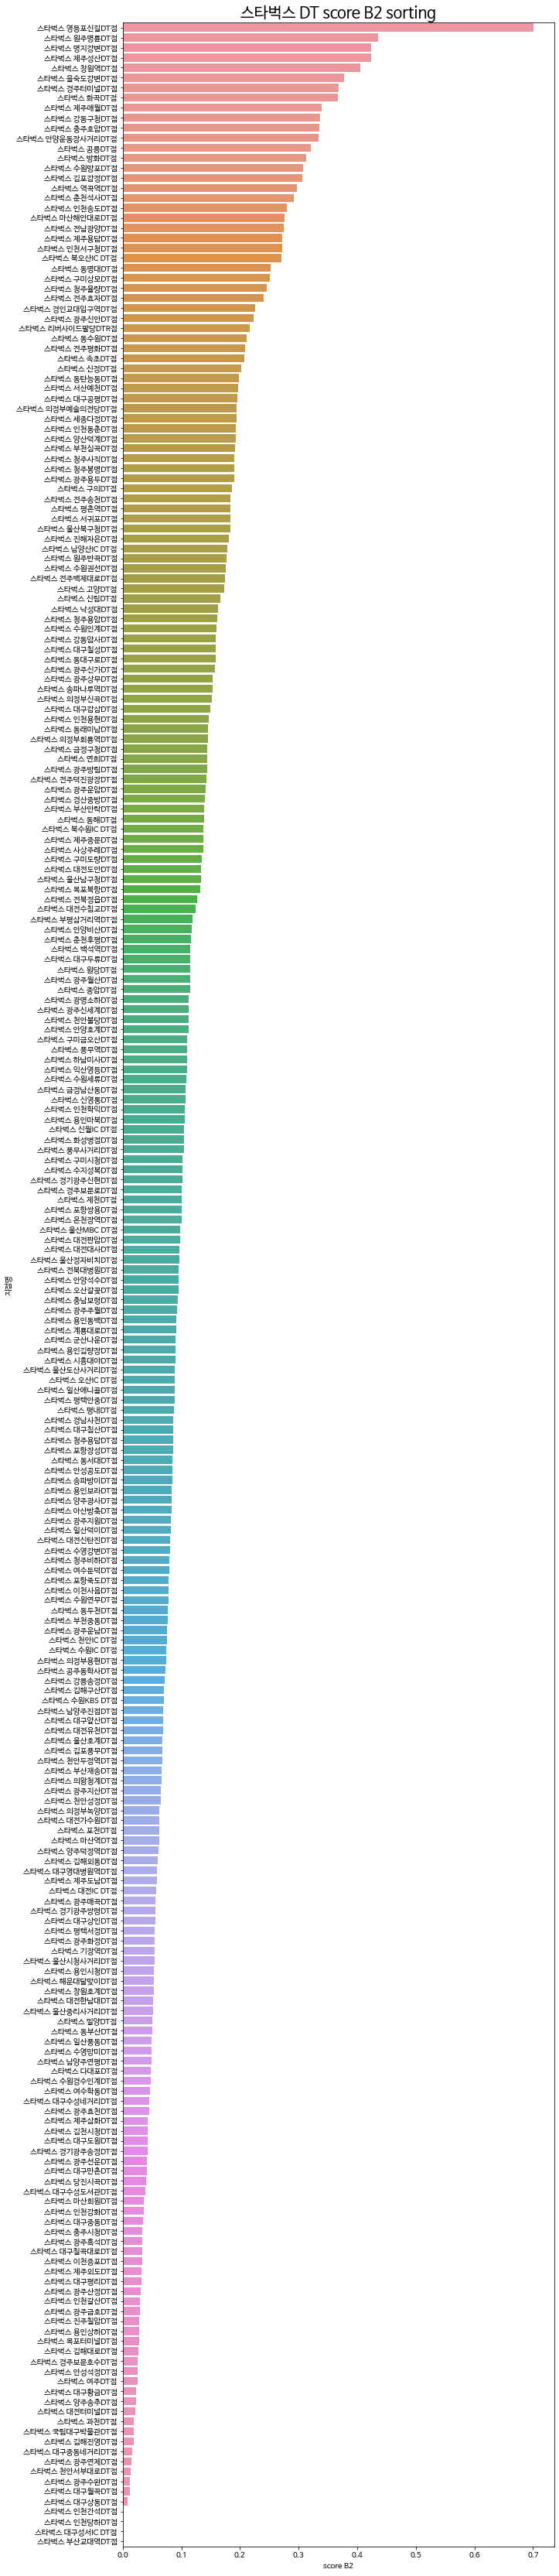

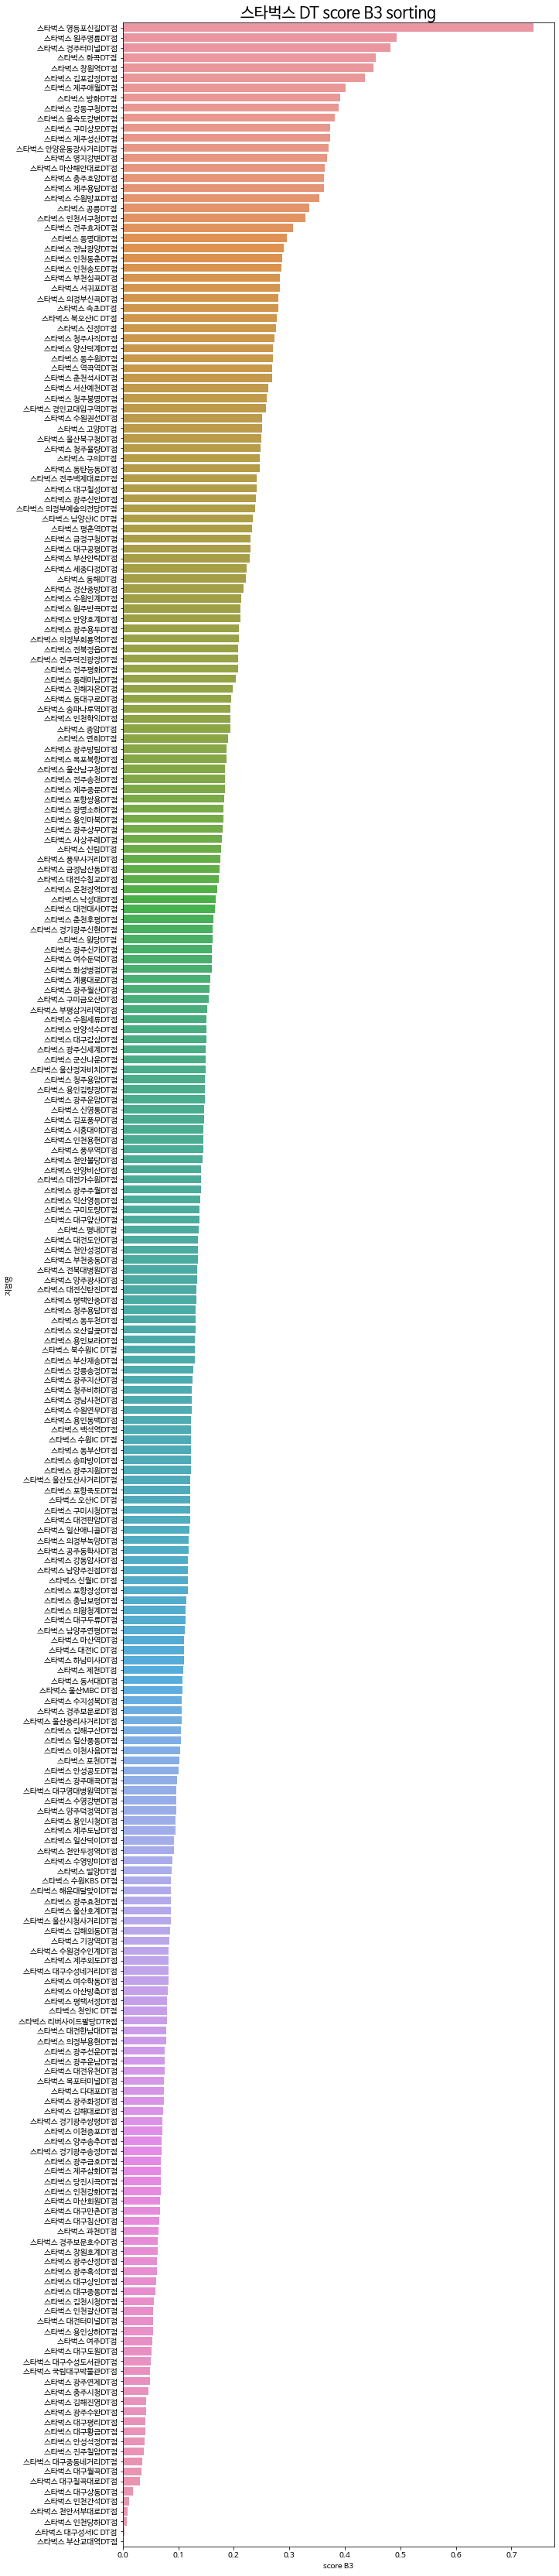

In [75]:
draw_score_sorting_graph(starbucks_feature5, ['score B1', 'score B2','score B3'])

# 최근지점 제외하고 나머지 지역들만 뽑기, 최근지점은 나머지 지점으로 학습한 모델로 예측한 값을 사용할 예정

## 최근 지점 제외한 상관계수

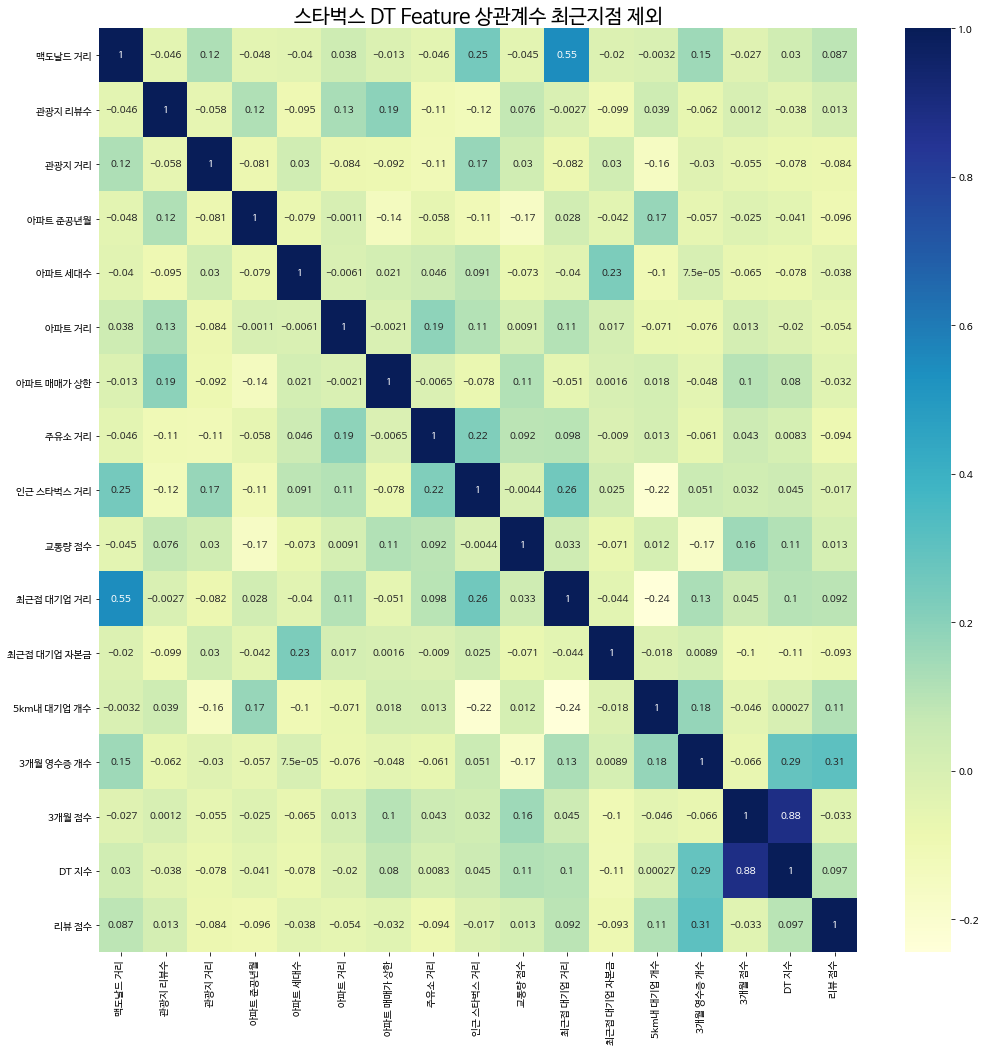

In [153]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(starbucks_feature_drop_smallreview.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수 최근지점 제외', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
save_plot.savefig("스타벅스 DT Feature 상관계수 최근지점 제외.png")

## 최근 지점의 상관계수

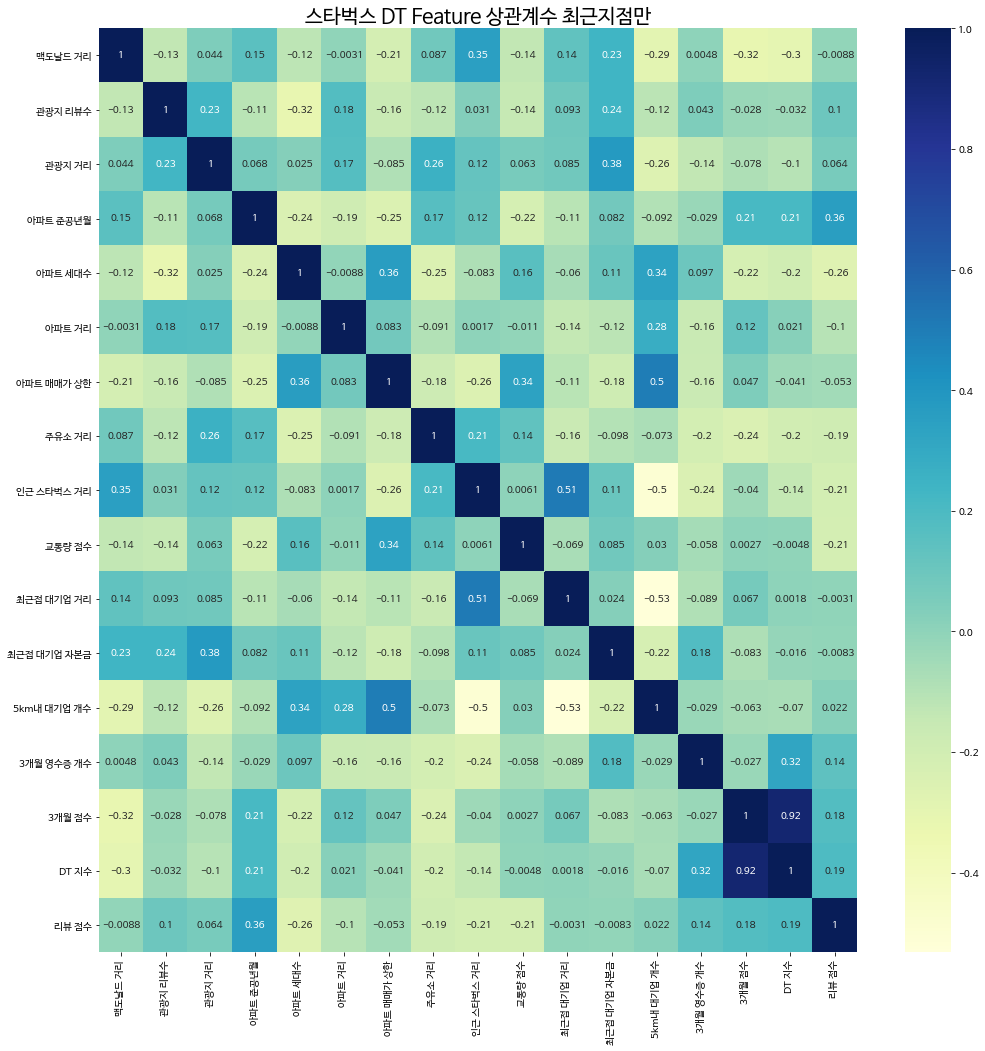

In [154]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(starbucks_feature_smallreview.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수 최근지점만', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
save_plot.savefig("스타벅스 DT Feature 상관계수 최근지점만.png")

## 3개월 영수증 개수 및 리뷰 점수를 토대로 score 산출

In [65]:
recipt_num = starbucks_feature_drop_smallreview['3개월 영수증 개수']
recipt_score = starbucks_feature_drop_smallreview['3개월 점수']
RV_score = starbucks_feature_drop_smallreview['리뷰 점수']

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
target_data = starbucks_feature_drop_smallreview[['3개월 영수증 개수', '리뷰 점수']]
scaled_data = minmax_scaler.fit_transform(target_data)
starbucks_feature_drop_smallreview['영수증 개수 norm'] = scaled_data[:,0]
starbucks_feature_drop_smallreview['리뷰 점수 norm'] = scaled_data[:,1]

starbucks_feature_drop_smallreview2 = starbucks_feature_drop_smallreview.drop(['3개월 점수'], axis=1)

starbucks_feature_drop_smallreview2['score A2'] = starbucks_feature_drop_smallreview.apply(lambda row:(row['영수증 개수 norm']*2 + row['리뷰 점수 norm'])/3, axis=1)

In [71]:
starbucks_feature_drop_smallreview2

지점명   맥도날드 거리  관광지 리뷰수    관광지 거리  아파트 준공년월  아파트 세대수    아파트 거리  \
0      스타벅스 강동구청DT점  1.197120     6187  0.994486    6584.0    349.0  0.292854   
1      스타벅스 강동암사DT점  1.431670       12  0.357707    6461.0    490.0  0.276806   
2    스타벅스 경기광주신현DT점  5.578334     2692  2.560675     740.0    480.0  0.334426   
3      스타벅스 경남사천DT점  0.076778     2896  0.710316       NaN      NaN  0.226005   
4      스타벅스 경산중방DT점  3.097773     2975  0.759696   11393.0     59.0  0.198630   
..              ...       ...      ...       ...       ...      ...       ...   
208     스타벅스 풍무역DT점  3.139839    18720  2.193646    2262.0    965.0  1.394994   
209    스타벅스 하남미사DT점  3.725406     4800  0.532727    1255.0   1222.0  1.159799   
210  스타벅스 해운대달맞이DT점  1.144530    42656  0.352457     252.0    882.0  0.226686   
211      스타벅스 화곡DT점  2.077286        0  0.572333    6887.0     87.0  0.349771   
212    스타벅스 화성병점DT점  0.778238    24681  2.730614    5365.0    109.0  0.298838   

       아파트 매매가 상한  주유소 거리  인근 스타벅스 거리    교통량 점수    최근접 대기업 거리   최근접 대기업 자본금  \
0    9.000000e+08   1.200       1.300  0.666667  1.399151e-01   32290818000   
1    1.100000e+09   2.100       1.500  2.333333  1.286706e+00   60000000000   
2    6.100000e+08   1.400      30.000  2.666667  8.472378e-01   13618612500   
3             NaN   0.792      30.000  2.833333  1.974756e+00  487375535000   
4    7.000000e+08   0.929       2.300  1.166667  1.773917e+00    1333560100   
..            ...     ...         ...       ...           ...           ...   
208  4.650000e+08   1.800       3.300  1.166667  1.374242e+00  119850042500   
209  1.250000e+09  30.000       1.400  2.166667  7.066210e-13   14000000000   
210  3.290000e+10   0.509       0.735  2.833333  1.160667e+00  109668508400   
211  5.750000e+08   1.400       1.100  4.000000  8.801149e-01   21425800000   
212  2.500000e+08   0.897       1.700  3.833333  1.083170e-01   12739510000   

     5km내 대기업 개수  3개월 영수증 개수     리뷰 점수  영수증 개수 norm  리뷰 점수 norm  score A2  
0             44         116  0.466487     0.688312    0.664873  0.680499  
1             29         109  0.134676     0.642857    0.162387  0.482700  
2             14          68  0.386742     0.376623    0.544110  0.432452  
3              3          68  0.282932     0.376623    0.386902  0.380050  
4              1          76  0.462436     0.428571    0.658738  0.505294  
..           ...         ...       ...          ...         ...       ...  
208            5          76  0.287242     0.428571    0.393430  0.416858  
209            6          85  0.180312     0.487013    0.231497  0.401841  
210            2          55  0.256102     0.292208    0.346271  0.310229  
211           60         115  0.573848     0.681818    0.827458  0.730365  
212           13          70  0.363115     0.389610    0.508330  0.429184  

[213 rows x 19 columns]

In [67]:
starbucks_feature_drop_smallreview2.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점제외_scoreA2_before_norm.xlsx', index=False)

In [68]:
starbucks_feature_smallreview2 = starbucks_feature_smallreview.drop(['3개월 점수'], axis=1)
target_data = starbucks_feature_smallreview[['3개월 영수증 개수', '리뷰 점수']]
scaled_data = minmax_scaler.fit_transform(target_data)
starbucks_feature_smallreview['영수증 개수 norm'] = scaled_data[:,0]
starbucks_feature_smallreview['리뷰 점수 norm'] = scaled_data[:,1]

starbucks_feature_smallreview2['score A2'] = starbucks_feature_smallreview.apply(lambda row:(row['영수증 개수 norm']*2 + row['리뷰 점수 norm'])/3, axis=1)

In [70]:
starbucks_feature_smallreview2

지점명   맥도날드 거리   관광지 리뷰수    관광지 거리  아파트 준공년월   아파트 세대수  \
0      스타벅스 강릉송정DT점  0.944571  0.007155  0.097307  0.884172  0.178500   
1    스타벅스 경기광주송정DT점  0.305620  0.300153  0.491845  0.214450  0.093418   
2    스타벅스 경기광주쌍령DT점  0.361871  0.300153  0.297400  0.036095  0.404139   
3      스타벅스 광주선운DT점  0.128919  0.298395  0.388403  0.121501  0.103191   
4      스타벅스 광주연제DT점  0.039033  0.464902  0.372987  0.278973  0.096005   
5      스타벅스 광주주월DT점  0.043831  0.565190  0.248858  0.072065  0.146306   
6      스타벅스 광주지산DT점  0.104951  0.001367  0.061637  0.214450  0.102328   
7      스타벅스 광주지원DT점  0.145494  0.000000  0.327143  0.011471  0.230239   
8      스타벅스 광주효천DT점  0.155334  0.291507  0.317510  0.098747  0.184823   
9   스타벅스 국립대구박물관DT점  0.040226  0.000000  0.139083  0.772271  0.057775   
10     스타벅스 군산나운DT점  0.002229  0.404488  0.320189  0.817842  0.224490   
11    스타벅스 금정남산동DT점  0.017700  0.000000  0.435727  0.774141  0.171601   
12      스타벅스 기장역DT점  0.008311  0.095175  0.300854  0.557945  0.319632   
13     스타벅스 김해진영DT점  0.282552  0.015729  0.511739  0.556013  0.023283   
14    스타벅스 남양주연평DT점  0.062785  0.325948  0.445661  0.221931  0.121874   
15     스타벅스 대구앞산DT점  0.063412  0.000000  0.088529  0.916526  0.052314   
16  스타벅스 대구영대병원역DT점  0.027122  0.031192  0.182903  0.324838  0.234719   
17    스타벅스 대전터미널DT점  0.048531  0.000000  0.291733  0.377657  0.229664   
18    스타벅스 목포터미널DT점  0.054263  0.000000  0.366706  0.324838  0.234719   
19       스타벅스 밀양DT점  0.022595  0.000000  0.122864  0.079733  0.080195   
20    스타벅스 부산교대역DT점  0.020672  0.000000  0.197070  0.100617  0.499856   
21   스타벅스 수원경수인계DT점  0.018998  0.433763  0.022787  0.360514  0.000000   
22     스타벅스 수원세류DT점  0.039931  0.000000  0.169738  0.453525  0.366197   
23     스타벅스 시흥대야DT점  0.136432  0.061089  0.132536  0.003803  0.183961   
24     스타벅스 아산방축DT점  0.031882  0.215594  0.127785  0.083536  0.181374   
25     스타벅스 양주송추DT점  0.081834  0.433798  0.344295  0.413628  0.108077   
26     스타벅스 여수학동DT점  0.009376  0.026452  0.032279  0.129107  0.054326   
27     스타벅스 울산호계DT점  0.007325  0.032826  0.111778  0.032292  0.257258   
28     스타벅스 의왕청계DT점  0.129515  0.000000  0.162403  0.000000  0.504455   
29     스타벅스 이천사음DT점  0.126139  0.411039  0.229896  0.309332  0.033918   
30     스타벅스 인천강화DT점  0.556161  0.000000  0.085440  0.182158  0.029031   
31    스타벅스 전북대병원DT점  0.021777  0.471133  0.299213  0.280905  0.167577   
32     스타벅스 제주삼화DT점  0.114485  0.306917  0.293365  0.324838  0.234719   
33     스타벅스 제주외도DT점  0.176931  0.365183  0.391355  0.316876  0.007761   
34    스타벅스 천안두정역DT점  0.050884  0.006320  0.360788  0.521788  0.292900   
35     스타벅스 청주비하DT점  0.000797  0.054893  0.194973  0.383268  0.268181   
36     스타벅스 평택안중DT점  0.429898  0.000000  0.520438  0.332087  0.208393   
37     스타벅스 포항죽도DT점  0.004279  0.000000  0.290510  0.026557  0.444955   
38    스타벅스 풍무사거리DT점  0.085452  0.332339  0.186207  0.368119  0.159816   

          아파트 거리  아파트 매매가 상한    주유소 거리  인근 스타벅스 거리    교통량 점수  최근접 대기업 거리  \
0   7.236948e-05    0.000000  0.001667    1.000000  0.250000    0.076713   
1   8.718778e-05    0.009014  0.004900    0.052386  0.708333    0.049896   
2   6.259375e-06    0.012517  0.036635    0.102436  0.666667    0.104878   
3   5.267943e-04    0.009014  0.069969    0.185853  0.458333    0.032192   
4   5.193512e-05    0.006121  0.046635    0.055722  0.208333    0.051804   
5   1.826812e-04    0.011755  0.022634    0.042376  0.416667    0.051407   
6   2.071314e-05    0.007796  0.043301    0.025092  0.625000    0.024470   
7   1.503273e-05    0.021349  0.019001    0.112446  0.458333    0.062826   
8   2.101340e-04    0.015714  0.024034    1.000000  0.500000    0.063265   
9   6.196613e-05    0.034139  0.083303    0.065732  0.500000    0.048583   
10  1.614670e-05    0.000274  0.043301    1.000000  0.333333    0.062500   
11  6.946721e-05    0.013735  0.018167    0.055722  0.583333    0.038657   
12  5.688775e-05    0.006730  0.006167    1.000000  0.583333    0.268010   
13  6.791991e-07    0.000640  1

In [69]:
starbucks_feature_smallreview2.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만_scoreA2_before_norm.xlsx', index=False)

## 상관계수

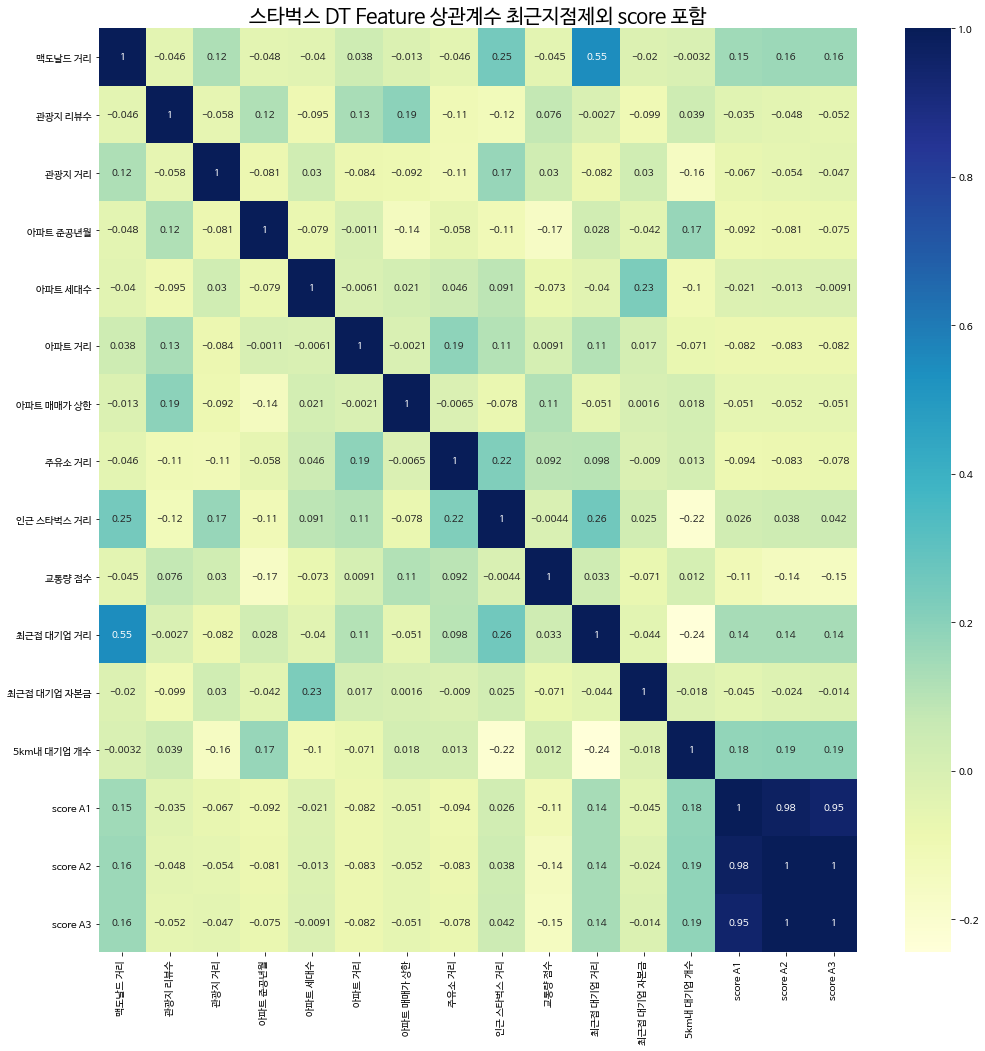

In [156]:
plt.figure(figsize=(17,17))
sns_plot = sns.heatmap(starbucks_feature_drop_smallreview2.drop('지점명', axis=1).corr(), annot=True, cmap='YlGnBu') # 
plt.title('스타벅스 DT Feature 상관계수 최근지점제외 score 포함', fontsize=20)
plt.show()
save_plot = sns_plot.get_figure()
save_plot.savefig("스타벅스 DT Feature 상관계수 최근지점제외 score 포함.png")

## score에 따른 스타벅스 DT점 sorting 결과보기

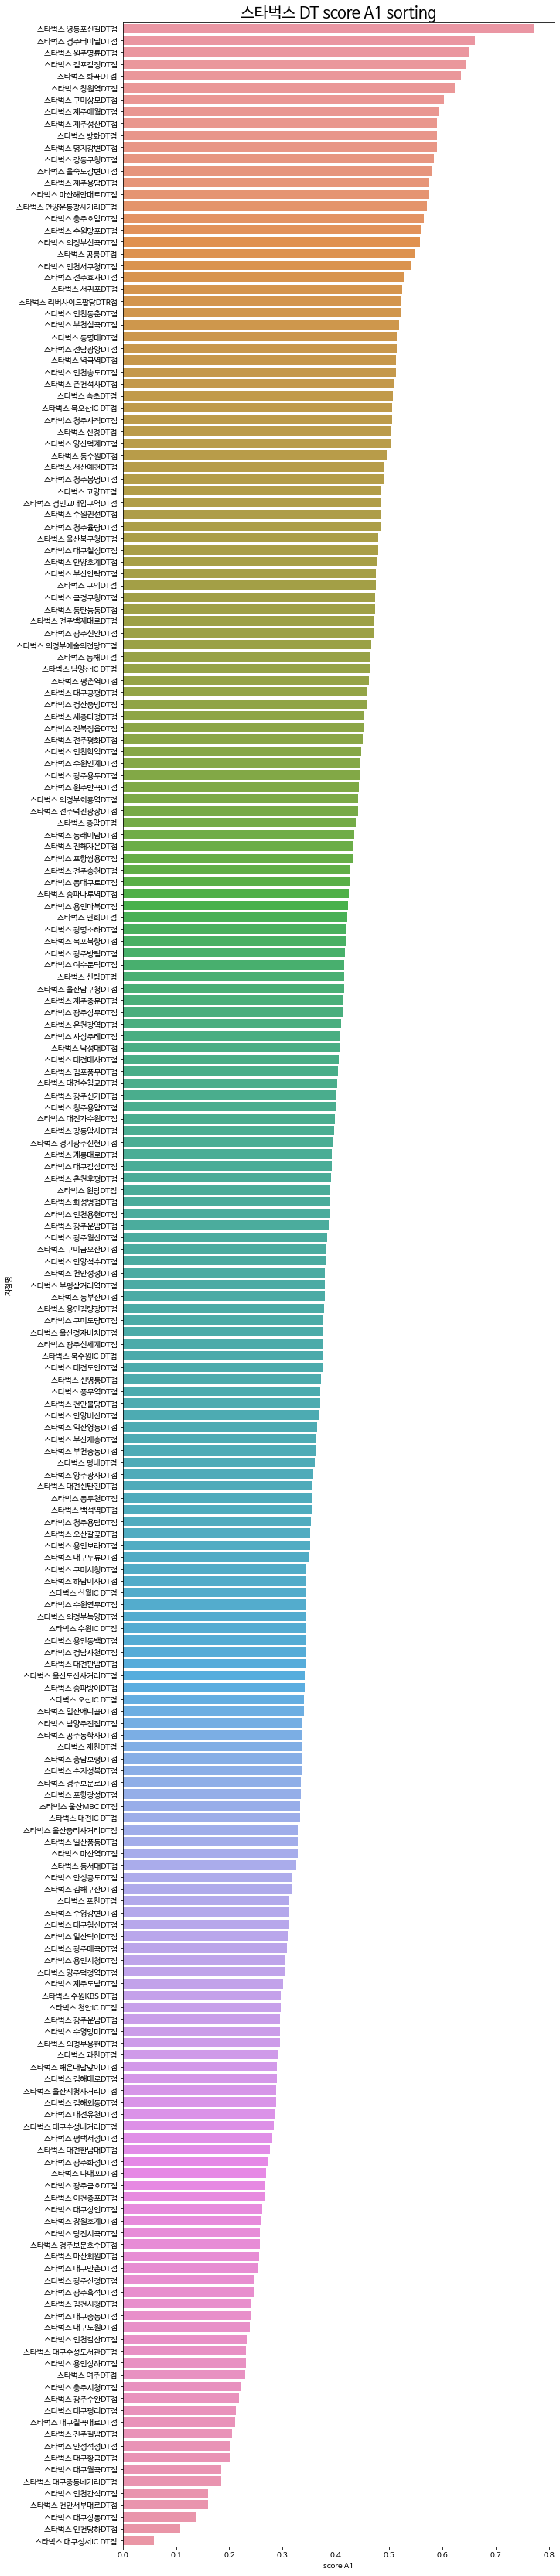

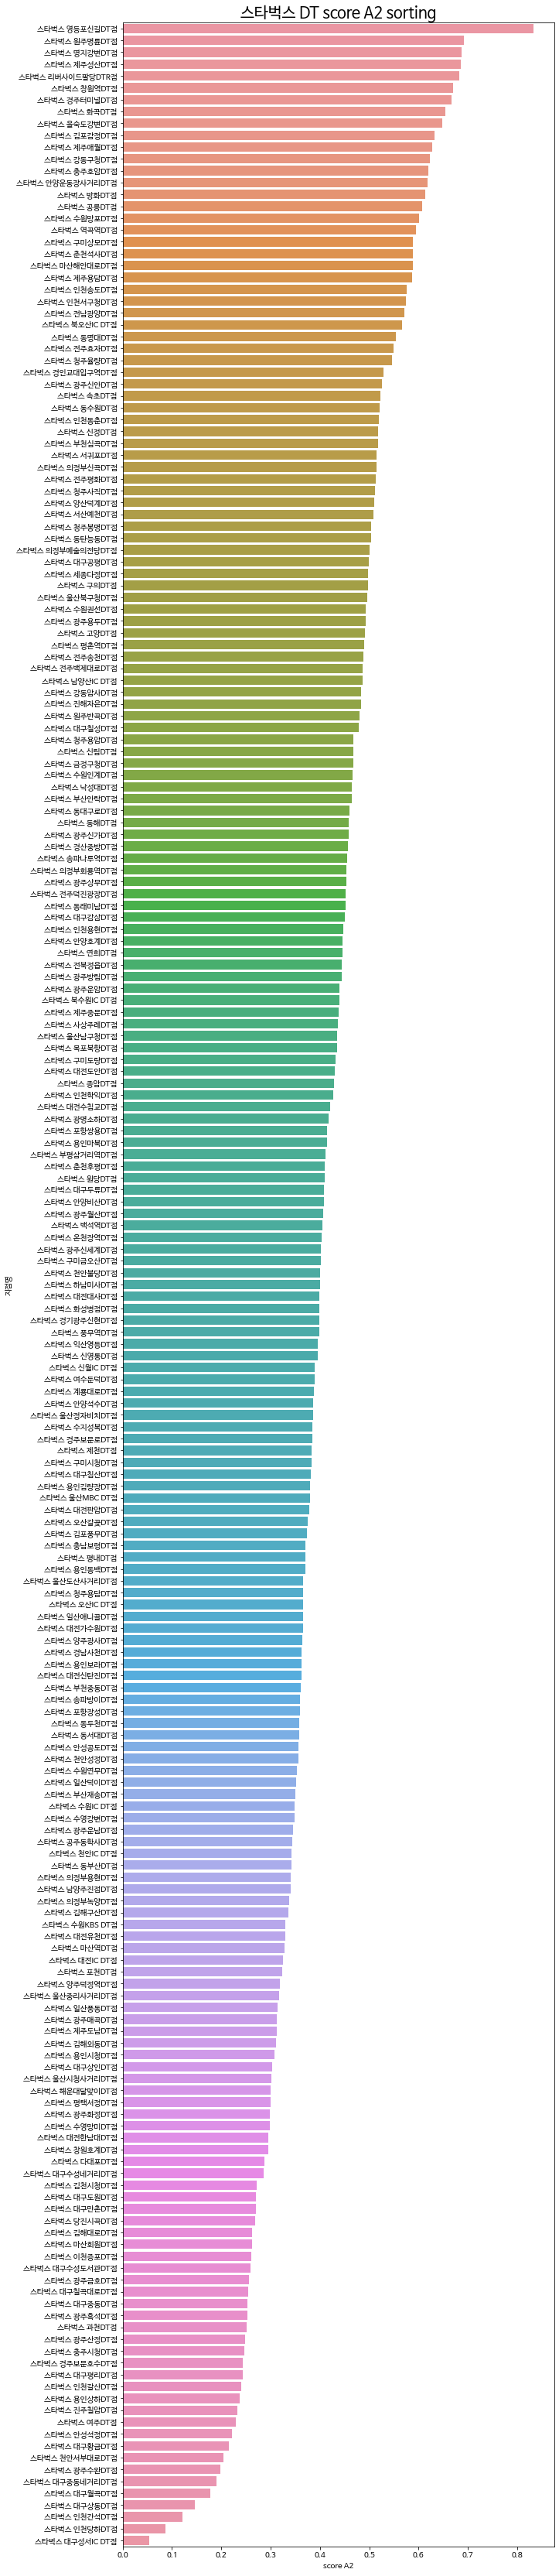

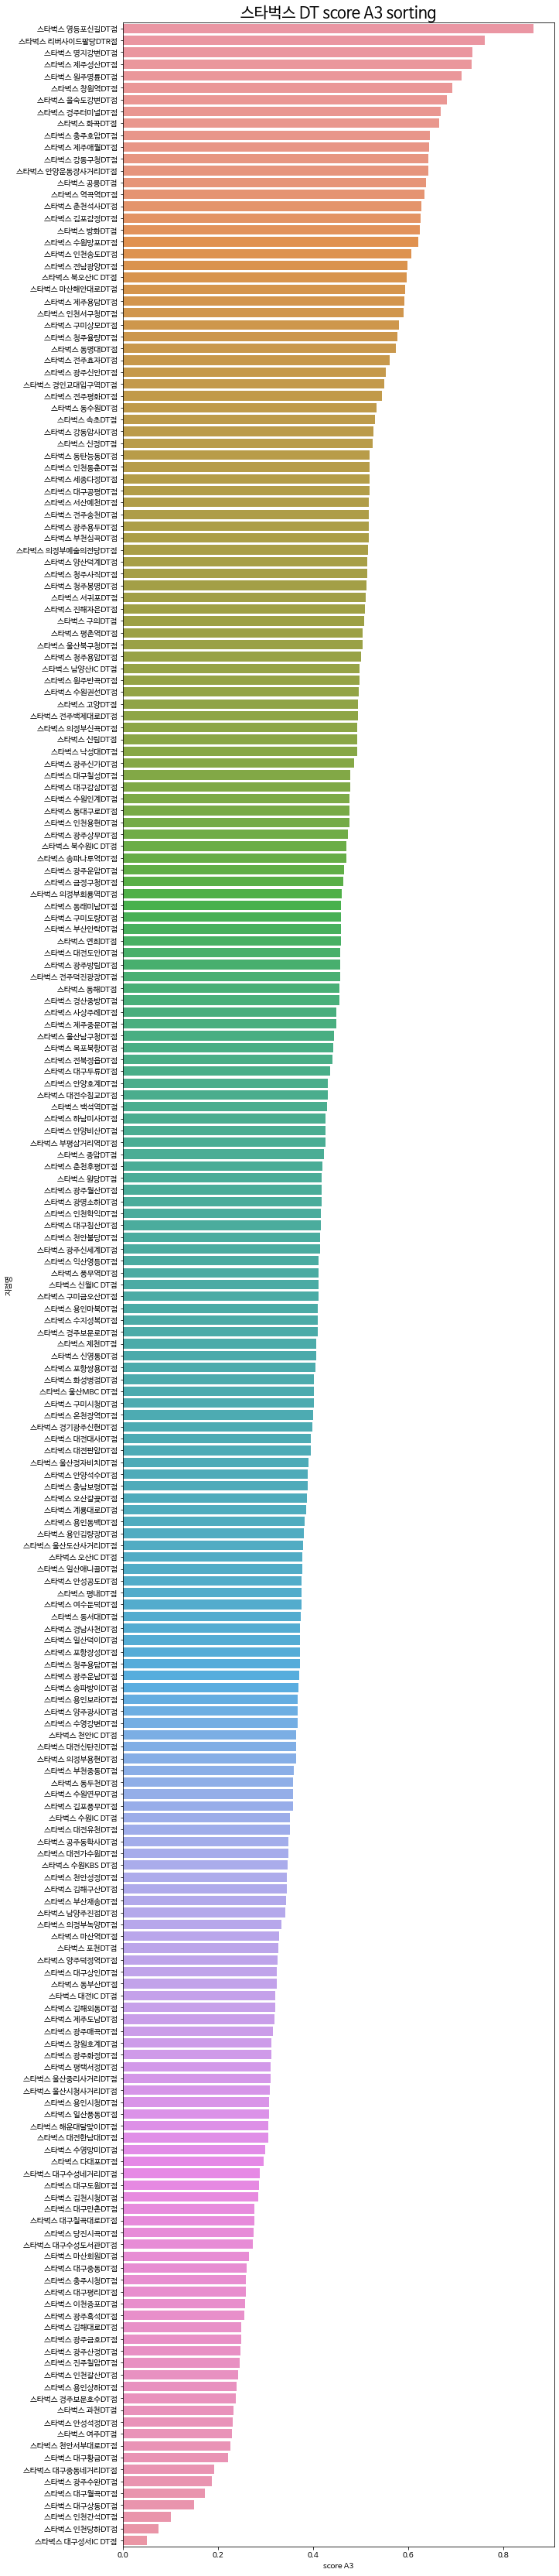

In [157]:
draw_score_sorting_graph(starbucks_feature_drop_smallreview2, ['score A1', 'score A2','score A3'])

## 2019년 후반에 생긴 리뷰가 적은 DT점들을 제외시킴
- 이제 평점이 낮은 곳은 정말 입지 조건이 안좋은 곳으로 생각할 수 있음
- 대구성서IC는 2017년도에도 있었으나 평점이 낮음

## 교차로 데이터, 공시지가 데이터 추가

In [106]:
intersect_data = pd.read_csv('/Users/dhkim/Downloads/스타벅스_유명교차로_거리.csv', encoding='cp949')
st_price_data = pd.read_excel('/Users/dhkim/Downloads/공시지가.xlsx')

In [115]:
df5[df5.지점명.map(lambda x: 'R' in x)].지점명

101    스타벅스 리버사이드팔당DTR점
Name: 지점명, dtype: object

In [152]:
def dt_naming(x):
    if 'IC' in x:
        return '스타벅스 ' + x + ' DT점'
    elif 'MBC' in x:
        return '스타벅스 ' + x + ' DT점'
    else:
        return '스타벅스 ' + x + '점'

In [138]:
intersect_data['지점명'] = intersect_data['STARBUCKS'].map(lambda x:'스타벅스 '+x+'점')

In [217]:
intersect_data

POP_INTERCEPT  Distance(m)               지점명
0           심곡사거리           30     스타벅스 인천서구청DT점
1           미포오거리           38    스타벅스 해운대달맞이DT점
2           신곡사거리           40     스타벅스 의정부신곡DT점
3           월곡네거리           44      스타벅스 대구도원DT점
4        서서울호수공원앞           50     스타벅스 신월IC DT점
5           석봉네거리           56     스타벅스 대전신탄진DT점
6           공평네거리           60      스타벅스 대구공평DT점
7          창원역사거리           61       스타벅스 창원역DT점
8        수협공판장사거리           64    스타벅스 마산해안대로DT점
9           유천네거리           65      스타벅스 대전유천DT점
10        범골입구사거리           86  스타벅스 의정부예술의전당DT점
11          인계사거리           87      스타벅스 수원인계DT점
12          부평삼거리           92    스타벅스 부평삼거리역DT점
13          선사사거리           95      스타벅스 강동암사DT점
14        강동구청삼거리           95      스타벅스 강동구청DT점
15        버들만이삼거리           98      스타벅스 원주반곡DT점
16       송탄출장소사거리          103      스타벅스 평택서정DT점
17     교직원공제회앞사거리          110     스타벅스 광주신세계DT점
18        시청입구삼거리          115       스타벅스 서귀포DT점
19         MBC사거리          122    스타벅스 울산MBC DT점
20         신방화사거리          126        스타벅스 방화DT점
21         운동장사거리          128  스타벅스 안양운동장사거리DT점
22          완정사거리          129      스타벅스 인천당하DT점
23          침산네거리          135      스타벅스 대구침산DT점
24         만가대사거리          136     스타벅스 의정부용현DT점
25         MBC네거리          141      스타벅스 동대구로DT점
26         백석역사거리          144       스타벅스 백석역DT점
27         백석역사거리          144        스타벅스 고양DT점
28          구성사거리          147      스타벅스 용인마북DT점
29          감정삼거리          147      스타벅스 김포감정DT점
..            ...          ...               ...
219         목동사거리         1700        스타벅스 신정DT점
220      부영아파트삼거리         1700      스타벅스 제주외도DT점
221         변동오거리         1800     스타벅스 대전수침교DT점
222         감삼네거리         1800      스타벅스 대구감삼DT점
223         화곡사거리         1800        스타벅스 화곡DT점
224         간석오거리         1800      스타벅스 인천간석DT점
225      부산대후문사거리         1800      스타벅스 금정구청DT점
226        전화국사거리         1900      스타벅스 부천중동DT점
227        범어사사거리         1900     스타벅스 금정남산동DT점
228        아주대삼거리         1000       스타벅스 동수원DT점
229         안락교차로         1000      스타벅스 부산안락DT점
230      서울구치소삼거리         1000      스타벅스 의왕청계DT점
231        석전교사거리         1000       스타벅스 마산역DT점
232         수청사거리         1000      스타벅스 충남보령DT점
233         흑석사거리         2100      스타벅스 광주신가DT점
234      청량사어귀삼거리         2100      스타벅스 명지강변DT점
235         복대사거리         2100      스타벅스 청주비하DT점
236        학원가사거리         2100       스타벅스 평촌역DT점
237           소태역         2200      스타벅스 광주방림DT점
238       교통방송사거리         2200      스타벅스 인천용현DT점
239         창포사거리         2200      스타벅스 포항장성DT점
240        구상골사거리         2200    스타벅스 천안서부대로DT점
241        장안로삼거리         2200    스타벅스 경기광주신현DT점
242        구상골사거리         2400     스타벅스 천안두정역DT점
243     제주교도소앞오거리         2400      스타벅스 제주도남DT점
244        외암도사거리         2900      스타벅스 인천동춘DT점
245         구산육거리         3600      스타벅스 김해대로DT점
246        외암도사거리         3000      스타벅스 인천송도DT점
247       공항입구교차로         4700      스타벅스 제주용담DT점
248        보문교삼거리         4000     스타벅스 경주보문로DT점

[249 rows x 3 columns]

In [159]:
st_price_info['지점명'] = st_price_info['name'].map(lambda x:dt_naming(x))

In [160]:
print(intersect_data.shape, df5.shape)

(249, 4) (252, 26)


In [161]:
print(st_price_info.shape, df5.shape)

(220, 8) (252, 26)


In [162]:
len(set(df5.지점명).difference(set(st_price_info['지점명'])))

32

In [163]:
st_price_info[st_price_info['지점명'].map(lambda x:x not in df5['지점명'].values)]

Empty DataFrame
Columns: [name, 2017, 2018, 2019, 3year, 3year_diff_mean, 3year_diff, 지점명]
Index: []

In [164]:
intersect_data[intersect_data.STARBUCKS.map(lambda x: 'R' in x)].STARBUCKS

Series([], Name: STARBUCKS, dtype: object)

In [174]:
# st_price_info = pd.read_csv('../starbucksDT/postprocess/starbucks_price_3year_mean_diff.csv', sep='\t')
st_price_info.to_excel('../starbucksDT/postprocess/207020_starbucks_price_3year_mean_diff.xlsx', index=False)

In [168]:
st_price_info = st_price_info.drop('name', axis=1)

In [179]:
st_price_info

2017    2018    2019        3year  3year_diff_mean  3year_diff  \
0  2343.0  2347.0  2381.5  2357.166667            19.25        38.5   
1  2008.0  2048.0  2180.0  2078.666667            86.00       172.0   
2   107.0   119.0   149.0   125.000000            21.00        42.0   
3   388.0   403.0   419.0   403.333333            15.50        31.0   
4   593.0   596.0   599.0   596.000000             3.00         6.0   

              지점명  
0    스타벅스 강동구청DT점  
1    스타벅스 강동암사DT점  
2    스타벅스 강릉송정DT점  
3  스타벅스 경기광주송정DT점  
4  스타벅스 경기광주신현DT점

In [173]:
# intersect_data = intersect_data.drop('STARBUCKS', axis=1)
intersect_data.to_excel('../starbucksDT/postprocess/200720_스타벅스_유명교차로_거리.xlsx', index=False)

In [223]:
intersect_data = intersect_data.sort_values('지점명').reset_index(drop=True)

In [224]:
intersect_data.head()

POP_INTERCEPT  Distance(m)             지점명
0       강동구청삼거리           95    스타벅스 강동구청DT점
1         선사사거리           95    스타벅스 강동암사DT점
2         포남오거리         1400    스타벅스 강릉송정DT점
3      송정교북단교차로         1200  스타벅스 경기광주송정DT점
4        장안로삼거리         2200  스타벅스 경기광주신현DT점

In [225]:
df5['인근_교차로_거리'] = intersect_data['Distance(m)']

In [229]:
df6 = pd.merge(left=df5, right=st_price_info[['지점명', '3year', '3year_diff_mean']],  on='지점명', how='outer')

In [230]:
df6 = df6.rename(columns={'3year':'최근3년_공시지가', '3year_diff_mean':'최근3년_공시지가_상승률'})

In [239]:
df6.to_excel('../starbucksDT/total/20200720_starbucksDT.xlsx', index=False)

In [240]:
df6 = df6.drop(['test', 'test2'], axis=1)

KeyError: "['test' 'test2'] not found in axis"

In [232]:
df6.columns

Index(['지점명', '맥도날드 거리', '관광지 리뷰수', '관광지 거리', '아파트 준공년월', '아파트 세대수', '아파트 거리',
       '아파트 매매가 상한', '주유소 거리', '인근 스타벅스 거리', '교통량 점수', '최근접 대기업 거리',
       '최근접 대기업 자본금', '5km내 대기업 개수', '3개월 영수증 개수', '3개월 점수', 'DT 지수', '리뷰 점수',
       'score A2', 'score A1', 'score A3', 'score B1', 'score B2', 'score B3',
       '인근_교차로_거리', '최근3년_공시지가', '최근3년_공시지가_상승률'],
      dtype='object')

In [233]:
df6 = df6[['지점명', '맥도날드 거리', '관광지 리뷰수', '관광지 거리', '아파트 준공년월', '아파트 세대수', '아파트 거리',
       '아파트 매매가 상한', '주유소 거리', '인근 스타벅스 거리', '교통량 점수', '최근접 대기업 거리',
       '최근접 대기업 자본금', '5km내 대기업 개수', '인근_교차로_거리', '최근3년_공시지가', '최근3년_공시지가_상승률',
       '3개월 영수증 개수', '3개월 점수', 'DT 지수', '리뷰 점수',
       'score A2', 'score A1', 'score A3', 
       'score B1', 'score B2', 'score B3']]

In [234]:
df6 = df6.rename(columns={'3개월 점수':'3개월 영수증 점수'})

In [235]:
colmap = {}
for col in df6.columns:
    colmap[col] = '_'.join(col.split(' '))

In [236]:
def col_rename_map(columns):
    colmap = {}
    for col in columns:
        colmap[col] = '_'.join(col.split(' '))
    return colmap


In [237]:
df6 = df6.rename(columns=col_rename_map(df6.columns))

In [238]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 27 columns):
지점명              252 non-null object
맥도날드_거리          252 non-null float64
관광지_리뷰수          252 non-null float64
관광지_거리           252 non-null float64
아파트_준공년월         252 non-null float64
아파트_세대수          252 non-null float64
아파트_거리           252 non-null float64
아파트_매매가_상한       252 non-null float64
주유소_거리           252 non-null float64
인근_스타벅스_거리       252 non-null float64
교통량_점수           252 non-null float64
최근접_대기업_거리       252 non-null float64
최근접_대기업_자본금      252 non-null float64
5km내_대기업_개수      252 non-null float64
인근_교차로_거리        249 non-null float64
최근3년_공시지가        220 non-null float64
최근3년_공시지가_상승률    220 non-null float64
3개월_영수증_개수       252 non-null float64
3개월_영수증_점수       252 non-null float64
DT_지수            252 non-null float64
리뷰_점수            252 non-null float64
score_A2         252 non-null float64
score_A1         252 non-null float64
score_A3         252 n

In [199]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 29 columns):
지점명              252 non-null object
맥도날드 거리          252 non-null float64
관광지 리뷰수          252 non-null float64
관광지 거리           252 non-null float64
아파트 준공년월         252 non-null float64
아파트 세대수          252 non-null float64
아파트 거리           252 non-null float64
아파트 매매가 상한       252 non-null float64
주유소 거리           252 non-null float64
인근 스타벅스 거리       252 non-null float64
교통량 점수           252 non-null float64
최근접 대기업 거리       252 non-null float64
최근접 대기업 자본금      252 non-null float64
5km내 대기업 개수      252 non-null float64
3개월 영수증 개수       252 non-null float64
3개월 점수           252 non-null float64
DT 지수            252 non-null float64
리뷰 점수            252 non-null float64
test             252 non-null float64
test2            252 non-null float64
score A2         252 non-null float64
score A1         252 non-null float64
score A3         252 non-null float64
score B1         252 n

In [245]:
df7 = pd.read_excel('/Users/dhkim/PycharmProjects/starbucksDT/total/20200720_starbucksDT_beformNorm2.xlsx')

In [246]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 47 columns):
지점명              252 non-null object
분류               252 non-null object
위도               252 non-null float64
경도               252 non-null float64
관광지 거리           252 non-null float64
관광지 리뷰수          252 non-null float64
교통량 점수           252 non-null float64
교통량 점수 아침        252 non-null float64
교통량 점수 저녁        252 non-null float64
교통량 점수 점심        252 non-null float64
교통량 점수 주말        252 non-null float64
교통량 점수 평일        252 non-null float64
맥도날드 거리          252 non-null float64
아파트 거리           252 non-null float64
아파트 매매가 상한       252 non-null float64
아파트 세대수          252 non-null float64
아파트 준공년월         252 non-null float64
인근 스타벅스 거리       252 non-null float64
주유소 거리           252 non-null float64
1년 영수증 개수        252 non-null int64
6개월 영수증 개수       252 non-null int64
3개월 영수증 개수       252 non-null int64
2개월 영수증 개수       252 non-null int64
1개월 영수증 개수       252 non-null i